Welcome to my Data Report! We will be investigating the relationship between Labor Force Participation Rate of Females Over the Age of 15 Against GDP. Our main question: Does an association between the two exist? Let's find out!

In [148]:
import pandas as pd
import time
import os
import matplotlib.pyplot as plt
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
from colorama import Fore, Back, Style

In [149]:
file_name = '/Users/EricsHome/Data_Bootcamp_Eric_Boyda _Spring_2019/World_Bank_Data.xlsx'
file_name_1 = '/Users/EricsHome/Data_Bootcamp_Eric_Boyda _Spring_2019/GDP in Current US Dollars 2.xlsx'
file_name_2 = '/Users/EricsHome/Data_Bootcamp_Eric_Boyda _Spring_2019/population_sizes.xlsx'

lf_df_all = pd.read_excel(file_name)
gdp_df_all = pd.read_excel(file_name_1)
pop_df_all = pd.read_excel(file_name_2)

In [150]:
def clean_function(df):
    df.columns = df.iloc[1]
    df = df.reindex(df.index.drop(1))
    df.drop([0], inplace = True)
    df = df.drop(columns = [1960.0,
 1961.0,
 1962.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0, 2018.0, "Country Code", "Indicator Name", "Indicator Code"])
    df.dropna(inplace = True)
    return df

In [151]:
lf_df_all = clean_function(lf_df_all)
gdp_df_all = clean_function(gdp_df_all)
pop_df_all = clean_function(pop_df_all)

In [152]:
regions_df = pop_df_all.sort_values(by = 2017.0, ascending = False)

In [153]:
regions_df.drop(regions_df.index[15:17], inplace = True)
regions_df.drop(regions_df.index[41:52], inplace = True)
regions_df.drop(regions_df.index[42:64], inplace = True)
regions_df.drop(regions_df.index[43:53], inplace = True)
regions_df.drop(regions_df.index[44:], inplace = True)

In [154]:
country_list = lf_df_all["Country Name"]
gdp_df_all = gdp_df_all[(gdp_df_all["Country Name"].isin(country_list))]

In [155]:
country_list_2 = gdp_df_all["Country Name"]
lf_df_all = lf_df_all[(lf_df_all["Country Name"].isin(country_list_2))]

In [156]:
pop_df_all = pop_df_all[(pop_df_all["Country Name"].isin(country_list_2))]
regions_df = regions_df[(regions_df["Country Name"].isin(country_list_2))]

In [157]:
lf_df = lf_df_all.drop(regions_df.index, axis=0)
gdp_df = gdp_df_all.drop(regions_df.index, axis=0)
pop_df = pop_df_all.drop(regions_df.index, axis=0)

All of the code above cleaned the functions of 'nan' values and assured that each dataframe would have the same list of countries. I kept a dataframe with just the regions and three dataframes with everything, just in case I needed it. 

In this section, I wish to investigate how the top and lowest performing countries, in terms of labor force growth for women, compared to their GDP. I performed the counter for the countries with the highest and lowest GDP performances over the last 27 years.

In [158]:
lf_df_all["∆lf"] = lf_df[2017.0] - lf_df[1990.0]

In [159]:
gdp_df_all["∆gdp"] = gdp_df[2017.0] - gdp_df[1990.0]

In [160]:
lf_df["∆lf"] = lf_df[2017.0] - lf_df[1990.0]

In [161]:
gdp_df["∆gdp"] = gdp_df[2017.0] - gdp_df[1990.0]

In [162]:
gdp_df_all = gdp_df_all.sort_values(by = "∆gdp", ascending = False)

In [163]:
lf_df_all = lf_df_all.sort_values(by = "∆lf", ascending = False)

In [164]:
lf_df = lf_df.sort_values(by = "∆lf", ascending = False)

In [165]:
gdp_df = gdp_df.sort_values(by = "∆gdp", ascending = False)

In [166]:
lf_df.head(5)

1,Country Name,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,∆lf
45,Colombia,29.856001,30.379999,30.976000,31.450001,32.861000,34.294998,35.751999,37.223000,38.709000,...,55.125999,56.196999,57.279999,58.457001,58.631001,58.358002,58.967999,58.623001,58.805000,28.948999
186,Peru,43.134998,43.500999,44.584000,45.688999,46.824001,50.083000,52.778000,55.532001,55.909000,...,70.509003,72.033997,71.303001,71.141998,70.634003,69.642998,68.067001,68.513000,68.988998,25.854000
158,Mali,35.404999,35.433998,35.373001,35.367001,35.382999,35.400002,35.452000,35.516998,35.613998,...,47.481998,49.884998,52.608002,55.283001,57.869999,60.330002,60.374001,60.431000,60.757999,25.353001
152,Maldives,20.212999,21.652000,23.184999,24.799999,26.475000,28.186001,29.974001,31.778999,33.610001,...,50.865002,50.122002,49.375000,48.615002,47.826000,46.995998,44.469002,42.376999,42.875999,22.663000
146,"Macao SAR, China",44.164001,44.419998,45.953999,46.387001,47.289001,48.328999,55.490002,55.112000,54.915001,...,65.244003,65.306000,66.182999,65.510002,66.209999,66.589996,66.597000,66.122002,66.082001,21.917999


In [167]:
top_5_lf = ["Colombia", "Peru", "Mali" , "Maldives" , "Macao SAR, China"]

In [168]:
lf_df.tail(5)

1,Country Name,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,∆lf
16,Burundi,90.783997,90.345001,89.845001,89.282997,88.665001,87.992996,87.262001,86.464996,85.592003,...,80.610001,80.349998,80.112000,79.917000,79.748001,79.573997,79.869003,80.125000,80.213997,-10.570000
262,"Yemen, Rep.",16.832001,16.792999,16.761000,16.806999,16.848000,17.761999,18.707001,19.691000,20.716999,...,10.797000,10.049000,8.848000,7.800000,6.884000,6.084000,6.133000,6.171000,5.998000,-10.834001
40,China,73.197998,73.083000,72.971001,72.851997,72.707001,72.519997,72.296997,72.032997,71.725998,...,64.375999,63.777000,63.533001,63.296001,63.058998,62.775002,62.436001,62.034000,61.487999,-11.709999
201,Romania,62.076000,62.212002,62.381001,62.236000,62.043999,61.828999,58.709999,59.541000,58.443001,...,45.872002,46.331001,46.150002,46.279999,46.002998,46.146000,45.194000,44.476002,44.104000,-17.972000
19,Burkina Faso,76.218002,76.285004,75.478996,74.650002,73.792000,72.907997,71.987999,71.038002,70.063004,...,60.092999,59.717999,59.341000,58.971001,58.606998,58.249001,58.306000,58.367001,58.147999,-18.070004


In [169]:
bottom_5_lf = ["Burundi", "Yemen, Rep.", "China", "Romania", "Burkina Faso"]

In [170]:
gdp_df.head(5)

1,Country Name,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,∆gdp
251,United States,5.979589e+12,6.174043e+12,6.539299e+12,6.878718e+12,7.308755e+12,7.664060e+12,8.100201e+12,8.608515e+12,9.089168e+12,...,1.441874e+13,1.499205e+13,1.554258e+13,1.619701e+13,1.678485e+13,1.752175e+13,1.821930e+13,1.870719e+13,1.948539e+13,1.350580e+13
40,China,3.608579e+11,3.833733e+11,4.269157e+11,4.447313e+11,5.643247e+11,7.345479e+11,8.637467e+11,9.616040e+11,1.029043e+12,...,5.109954e+12,6.100620e+12,7.572554e+12,8.560547e+12,9.607224e+12,1.048237e+13,1.106467e+13,1.119099e+13,1.223770e+13,1.187684e+13
109,India,3.209790e+11,2.701053e+11,2.882084e+11,2.792960e+11,3.272756e+11,3.602820e+11,3.928971e+11,4.158678e+11,4.213515e+11,...,1.341887e+12,1.675615e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12,2.290432e+12,2.650725e+12,2.329746e+12
55,Germany,1.764968e+12,1.861874e+12,2.123131e+12,2.068556e+12,2.205966e+12,2.591620e+12,2.503665e+12,2.218689e+12,2.243226e+12,...,3.418005e+12,3.417095e+12,3.757698e+12,3.543984e+12,3.752514e+12,3.898727e+12,3.381389e+12,3.495163e+12,3.693204e+12,1.928236e+12
119,Japan,3.132818e+12,3.584420e+12,3.908809e+12,4.454144e+12,4.907039e+12,5.449116e+12,4.833713e+12,4.414733e+12,4.032510e+12,...,5.231383e+12,5.700098e+12,6.157460e+12,6.203213e+12,5.155717e+12,4.850414e+12,4.394978e+12,4.949273e+12,4.872415e+12,1.739597e+12


In [171]:
top_5_gdp = ["United States", "China", "India", "Germany", "Japan"]

In [172]:
gdp_df.tail(5)

1,Country Name,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,∆gdp
258,Vanuatu,1.583974e+08,1.888700e+08,1.961426e+08,1.880804e+08,2.192603e+08,2.339021e+08,2.451776e+08,2.558902e+08,2.623013e+08,...,6.100666e+08,7.008043e+08,7.921497e+08,7.817029e+08,8.017876e+08,8.149543e+08,7.379172e+08,7.879426e+08,8.628798e+08,7.044824e+08
46,Comoros,4.296221e+08,4.241088e+08,4.573886e+08,4.528814e+08,3.191892e+08,3.984618e+08,3.960538e+08,3.644456e+08,3.701068e+08,...,9.017114e+08,9.070931e+08,1.021747e+09,1.015901e+09,1.115906e+09,1.148058e+09,9.881502e+08,1.024262e+09,1.068124e+09,6.385022e+08
253,St. Vincent and the Grenadines,2.403653e+08,2.548296e+08,2.779541e+08,2.863078e+08,2.894385e+08,3.160085e+08,3.314897e+08,3.477700e+08,3.736199e+08,...,6.749225e+08,6.812260e+08,6.761294e+08,6.929337e+08,7.212090e+08,7.277144e+08,7.554580e+08,7.707622e+08,7.852225e+08,5.448572e+08
34,Central African Republic,1.440711e+09,1.377375e+09,1.411918e+09,1.278781e+09,8.511744e+08,1.115390e+09,1.007791e+09,9.377415e+08,9.673383e+08,...,1.981733e+09,1.986016e+09,2.195600e+09,2.169707e+09,1.518565e+09,1.702899e+09,1.583777e+09,1.755468e+09,1.949412e+09,5.087003e+08
239,Tonga,1.135638e+08,1.322011e+08,1.370663e+08,1.384899e+08,1.937759e+08,2.025470e+08,2.195836e+08,2.121551e+08,1.886870e+08,...,3.181666e+08,3.694852e+08,4.230118e+08,4.723583e+08,4.506864e+08,4.439111e+08,4.354382e+08,4.011175e+08,4.276598e+08,3.140960e+08


In [173]:
bottom_5_gdp = ["Vanuatu", "Comoros", "St. Vincent and the Grenadines", "Central African Republic", "Tonga"]

In [174]:
lf_df_all_transposed = lf_df_all.set_index(["Country Name"], inplace = True)
lf_df_all_transposed = lf_df_all.transpose()
lf_df_all_transposed = lf_df_all_transposed.drop("∆lf", axis = 0)

In [175]:
lf_df_transposed = lf_df.set_index(["Country Name"], inplace = True)
lf_df_transposed = lf_df.transpose()
lf_df_transposed = lf_df_transposed.drop("∆lf", axis = 0)

In [176]:
gdp_df_all_transposed = gdp_df_all.set_index(["Country Name"], inplace = True) 
gdp_df_all_transposed = gdp_df_all.transpose() 
gdp_df_all_transposed = gdp_df_all_transposed.drop("∆gdp", axis = 0)

In [177]:
gdp_df_transposed = gdp_df.set_index(["Country Name"], inplace = True) 
gdp_df_transposed = gdp_df.transpose() 
gdp_df_transposed = gdp_df_transposed.drop("∆gdp", axis = 0)

In [178]:
master_list = ['top_5_lf', 'bottom_5_lf', 'top_5_gdp', 'bottom_5_gdp']

All of the code above simply puts these high end or low end performing countries into groups so I can call on them later.

Let's start by looking at the world as a whole first 

                World: Change in Female Labor Force Participation Rate Against Change in GDP Over Time 


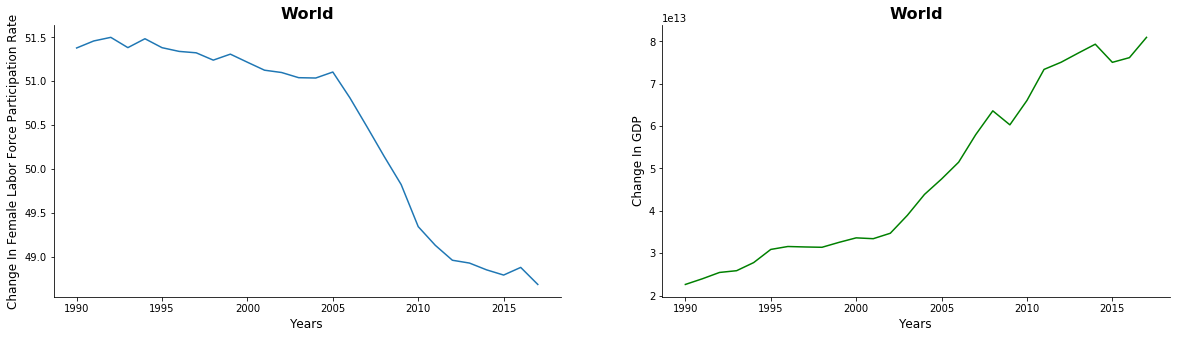

In [179]:
print(Fore.BLUE + Style.BRIGHT + "                World: Change in Female Labor Force Participation Rate Against Change in GDP Over Time ")
       
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize= (20,5))
    
ax1.plot(lf_df_all_transposed.index, lf_df_all_transposed["World"])

ax1.set_xlabel("Years", fontsize = 12)
ax1.set_ylabel("Change In Female Labor Force Participation Rate", fontsize = 12)

ax1.set_title("World", fontsize = 16, fontweight = "bold")

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
    
ax2.plot(gdp_df_all_transposed.index, gdp_df_all_transposed["World"], color = 'green')

ax2.set_xlabel("Years", fontsize = 12)
ax2.set_ylabel("Change In GDP", fontsize = 12)

ax2.set_title("World", fontsize = 16, fontweight = "bold")

ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)

plt.savefig("world_change.png", bbox_inches = "tight")

plt.show()

So the global figures do not support a positive association between Female Labor Force Growth and GDP. Let's look at the countries on an individual basis

                Top Five Countries: Growth in their Female Labor Force Participation Rate Over Time


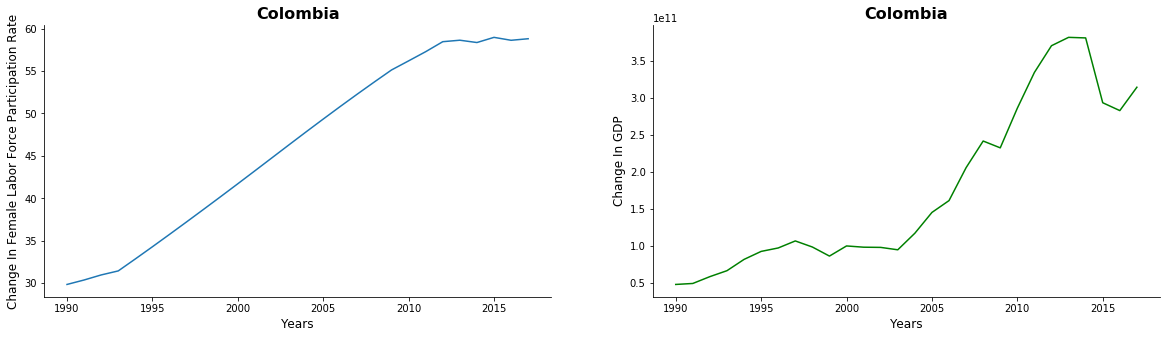

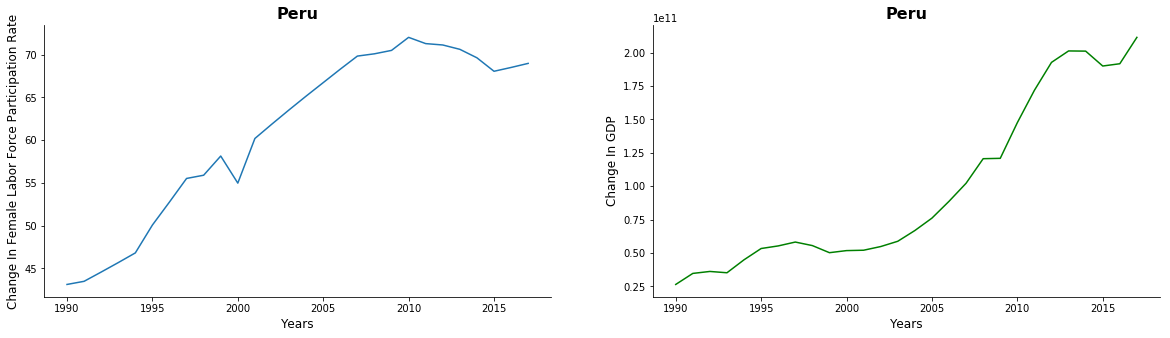

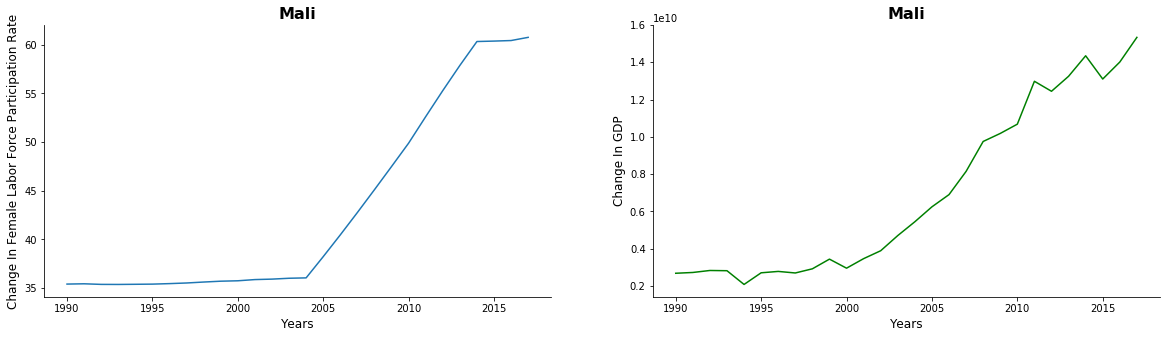

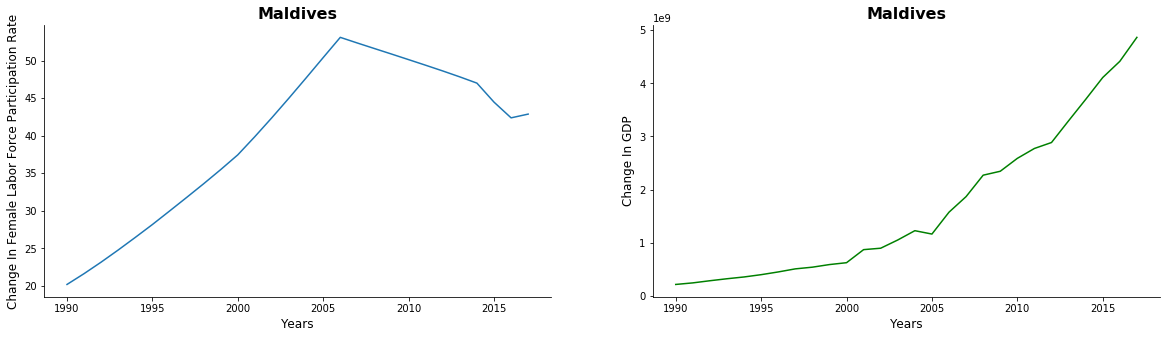

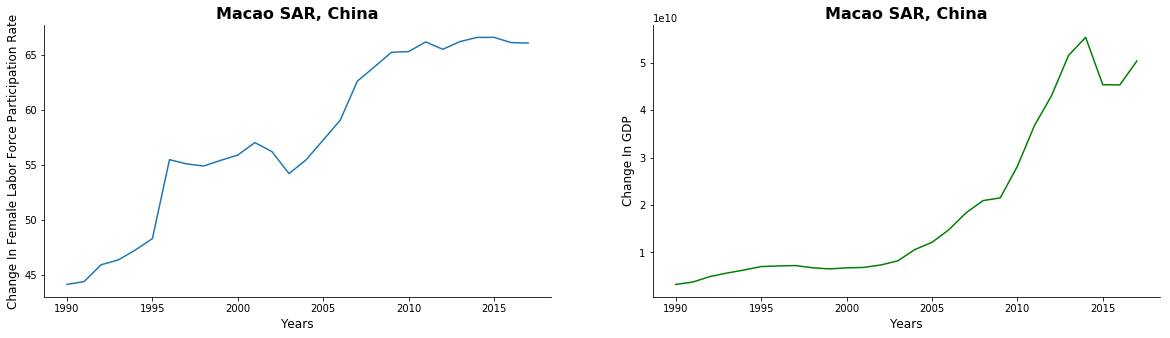

In [180]:
print(Fore.BLUE + Style.BRIGHT + "                Top Five Countries: Growth in their Female Labor Force Participation Rate Over Time")

for country in top_5_lf:
       
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize= (20,5))
    
    ax1.plot(lf_df_transposed.index, lf_df_transposed[country])

    ax1.set_xlabel("Years", fontsize = 12)
    ax1.set_ylabel("Change In Female Labor Force Participation Rate", fontsize = 12)

    ax1.set_title(country, fontsize = 16, fontweight = "bold")

    ax1.spines["right"].set_visible(False)
    ax1.spines["top"].set_visible(False)
    
    ax2.plot(gdp_df_transposed.index, gdp_df_transposed[country], color = 'green')

    ax2.set_xlabel("Years", fontsize = 12)
    ax2.set_ylabel("Change In GDP", fontsize = 12)

    ax2.set_title(country, fontsize = 16, fontweight = "bold")

    ax2.spines["right"].set_visible(False)
    ax2.spines["top"].set_visible(False)
    
    plt.savefig("top_5_labor_force.png", bbox_inches = "tight")

    plt.show()

                Bottom Five Countries: Growth in their Female Labor Force Participation Rate Over Time


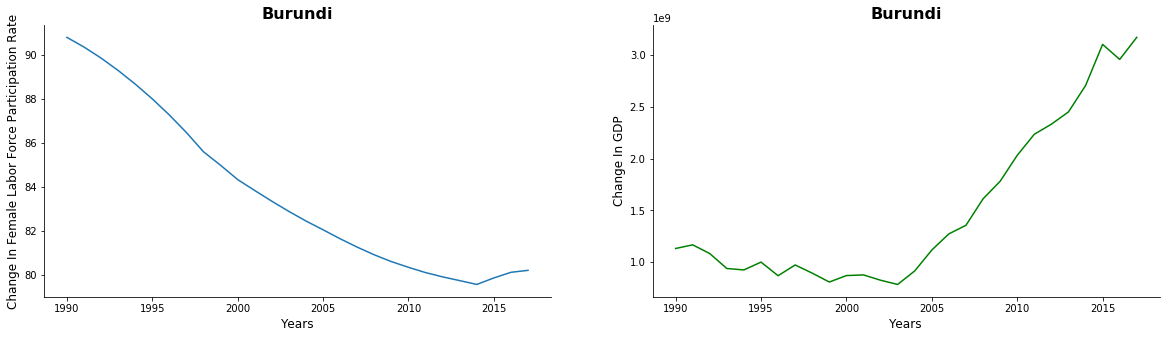

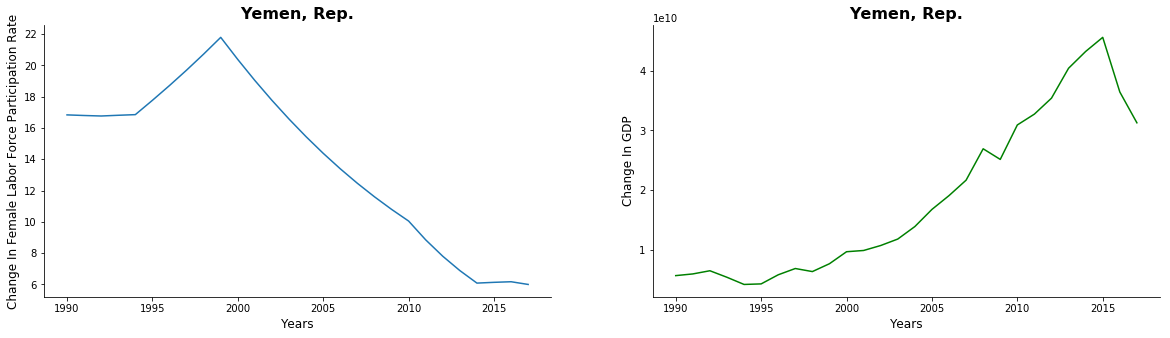

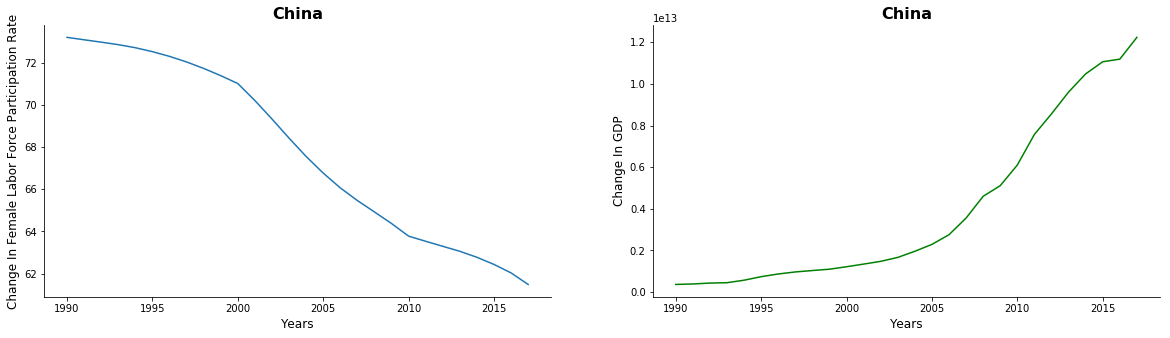

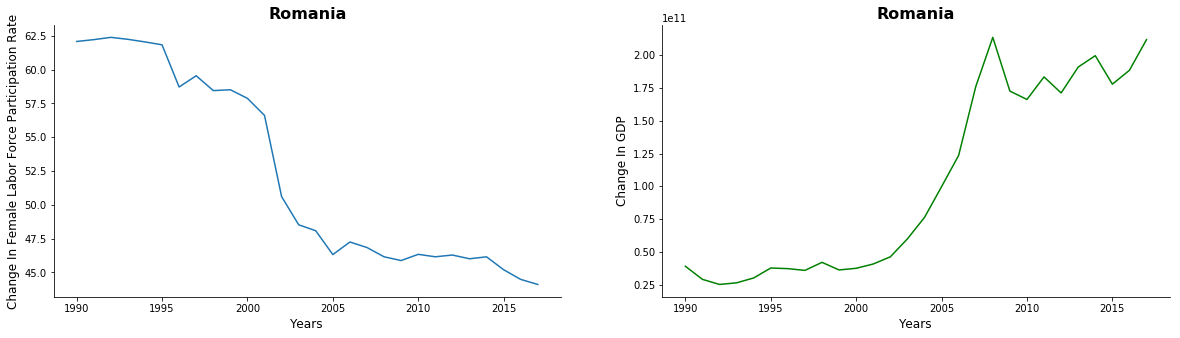

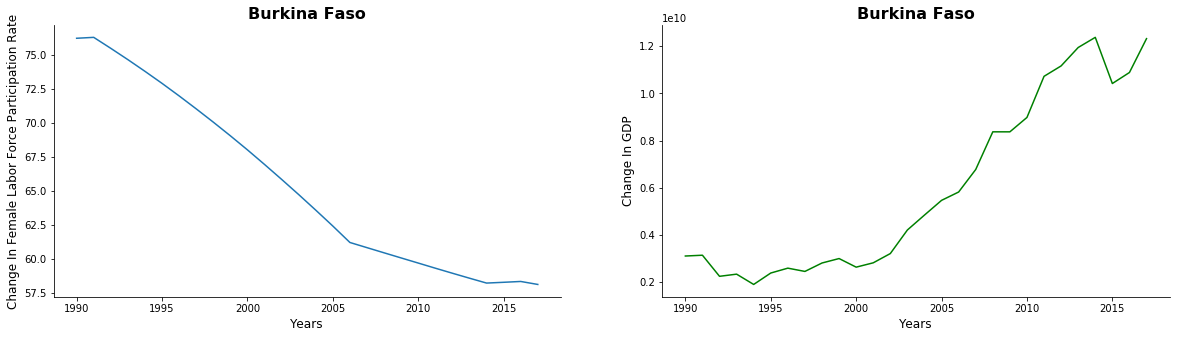

In [181]:
print(Fore.BLUE + Style.BRIGHT + "                Bottom Five Countries: Growth in their Female Labor Force Participation Rate Over Time")

for country in bottom_5_lf:
       
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize= (20,5))
    
    ax1.plot(lf_df_transposed.index, lf_df_transposed[country])

    ax1.set_xlabel("Years", fontsize = 12)
    ax1.set_ylabel("Change In Female Labor Force Participation Rate", fontsize = 12)

    ax1.set_title(country, fontsize = 16, fontweight = "bold")

    ax1.spines["right"].set_visible(False)
    ax1.spines["top"].set_visible(False)
    
    ax2.plot(gdp_df_transposed.index, gdp_df_transposed[country], color = 'green')

    ax2.set_xlabel("Years", fontsize = 12)
    ax2.set_ylabel("Change In GDP", fontsize = 12)

    ax2.set_title(country, fontsize = 16, fontweight = "bold")

    ax2.spines["right"].set_visible(False)
    ax2.spines["top"].set_visible(False)
    
    plt.savefig("bottom_5_labor_force.png", bbox_inches = "tight")

    plt.show()

                                 Top Five Countries: Growth in their GDP Over Time


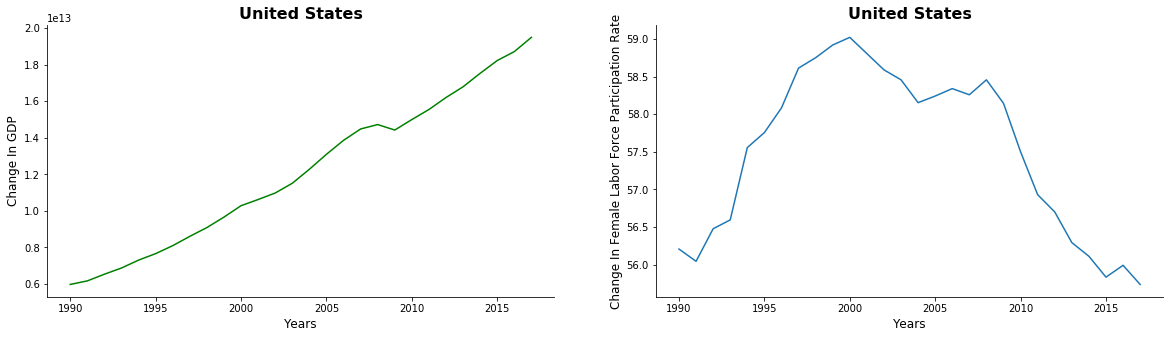

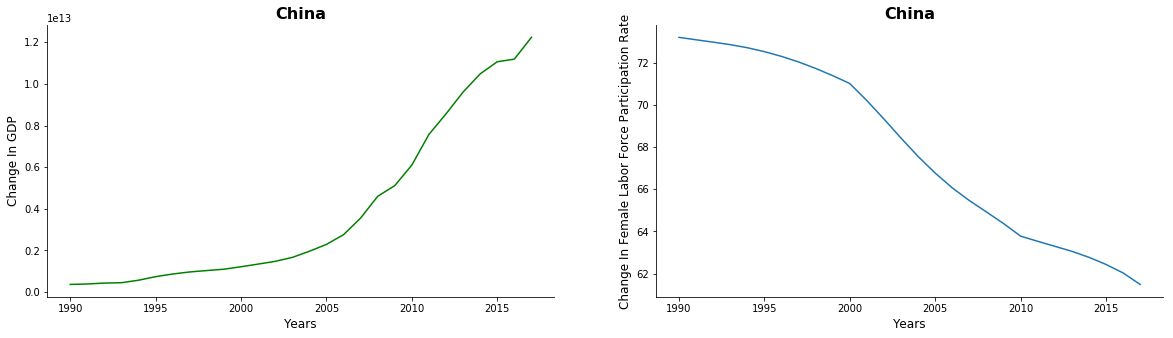

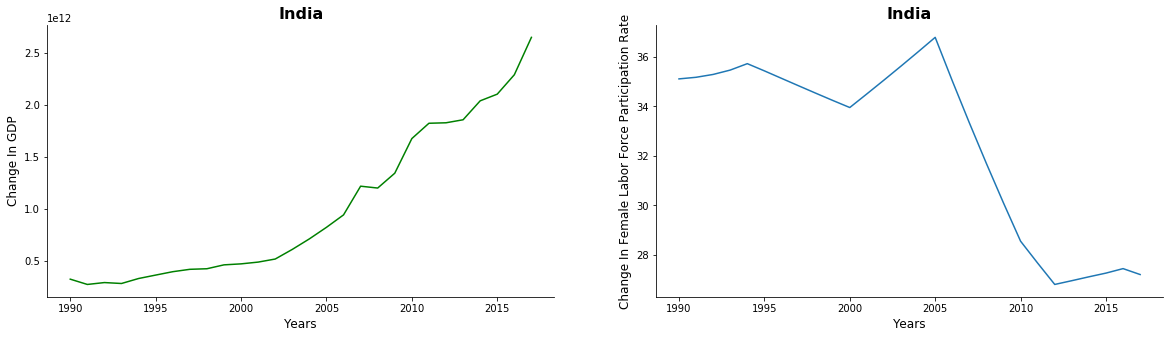

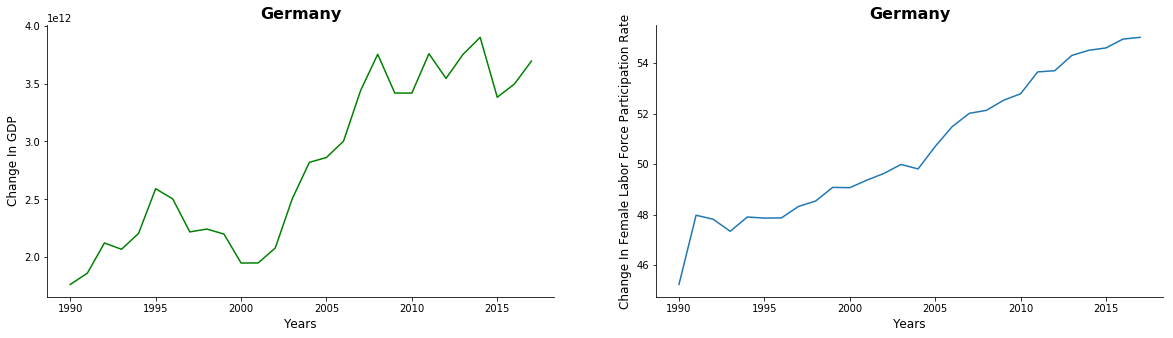

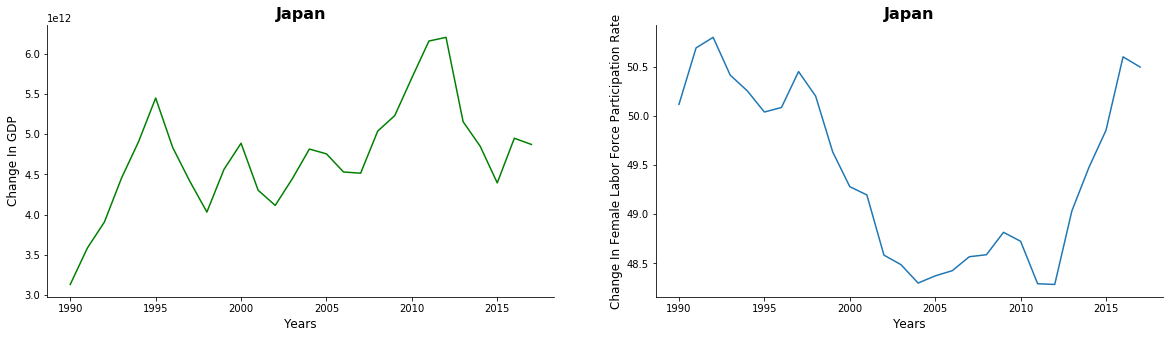

In [182]:
print(Fore.BLUE + Style.BRIGHT + "                                 Top Five Countries: Growth in their GDP Over Time")

for country in top_5_gdp:
       
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize= (20,5))
    
    ax1.plot(gdp_df_transposed.index, gdp_df_transposed[country], color = 'green')

    ax1.set_xlabel("Years", fontsize = 12)
    ax1.set_ylabel("Change In GDP", fontsize = 12)

    ax1.set_title(country, fontsize = 16, fontweight = "bold")

    ax1.spines["right"].set_visible(False)
    ax1.spines["top"].set_visible(False)
    
    ax2.plot(lf_df_transposed.index, lf_df_transposed[country])

    ax2.set_xlabel("Years", fontsize = 12)
    ax2.set_ylabel("Change In Female Labor Force Participation Rate", fontsize = 12)

    ax2.set_title(country, fontsize = 16, fontweight = "bold")

    ax2.spines["right"].set_visible(False)
    ax2.spines["top"].set_visible(False)
    
    plt.savefig("top_5_gdp.png", bbox_inches = "tight")

    plt.show()

                                 Bottom Five Countries: Growth in their GDP Over Time


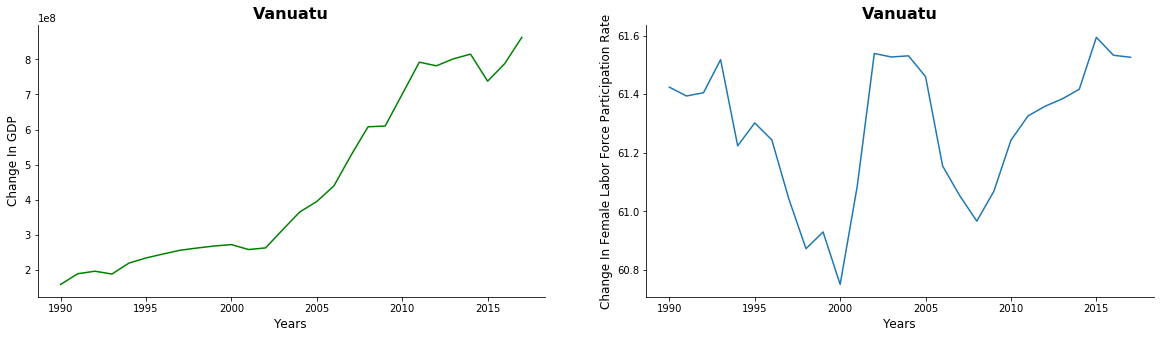

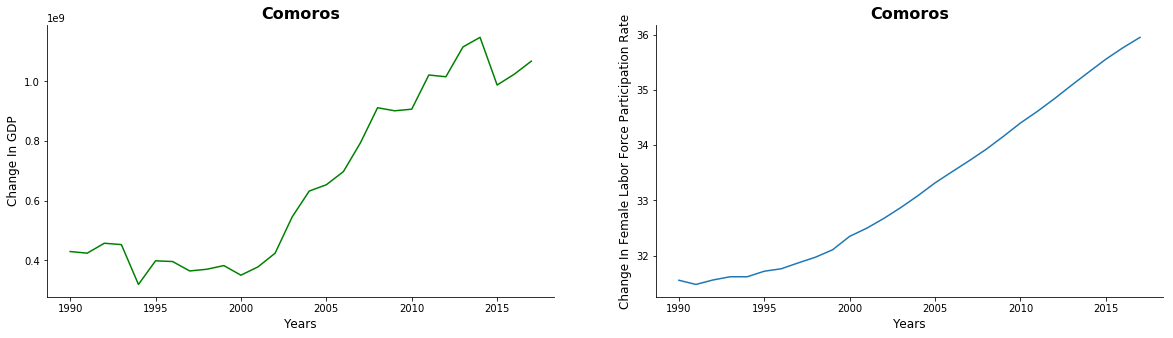

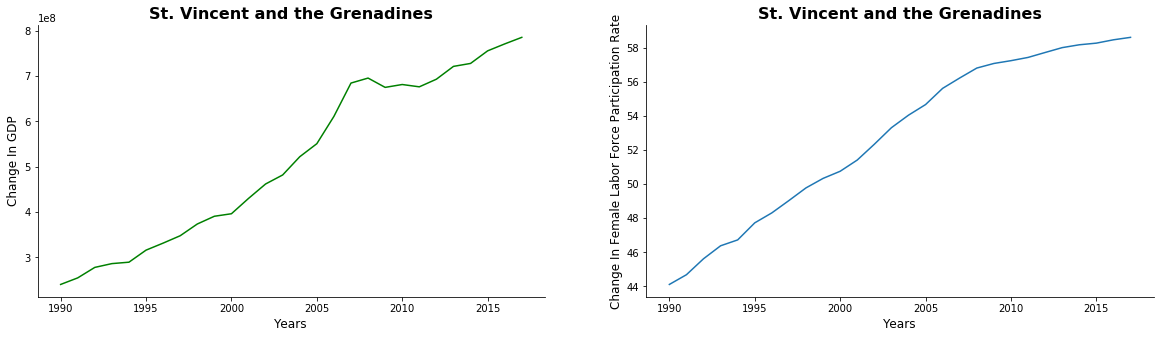

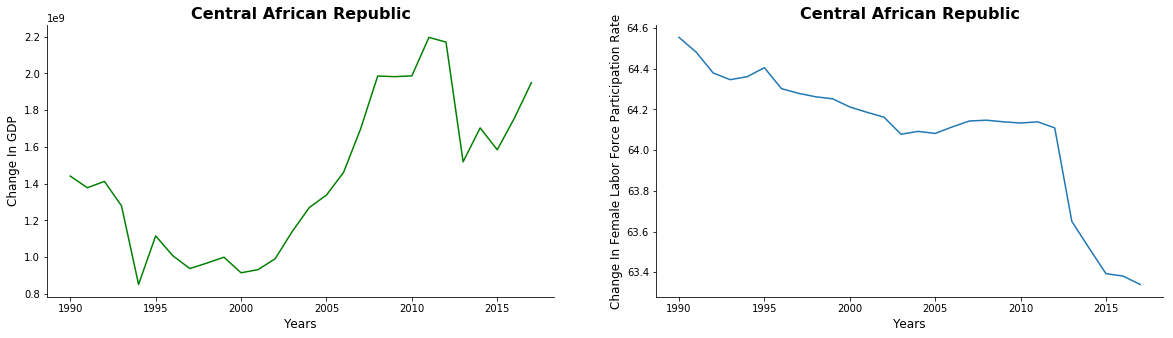

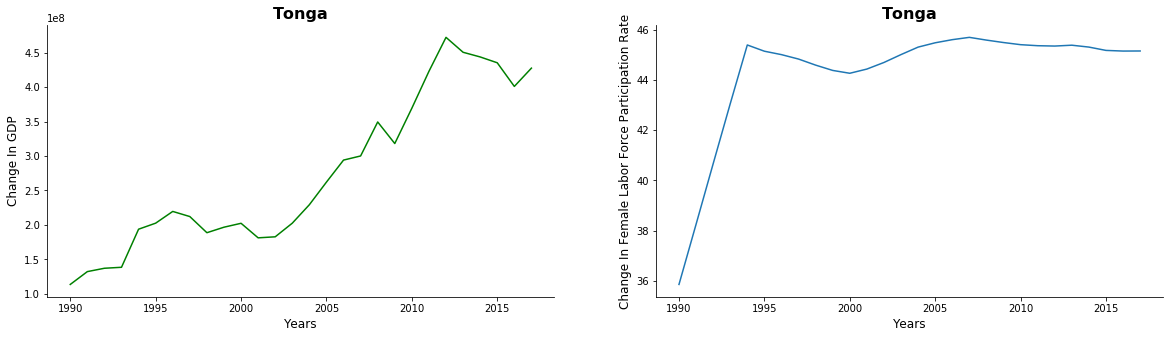

In [183]:
print(Fore.BLUE + Style.BRIGHT + "                                 Bottom Five Countries: Growth in their GDP Over Time")

for country in bottom_5_gdp:
       
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize= (20,5))
    
    ax1.plot(gdp_df_transposed.index, gdp_df_transposed[country], color = 'green')

    ax1.set_xlabel("Years", fontsize = 12)
    ax1.set_ylabel("Change In GDP", fontsize = 12)

    ax1.set_title(country, fontsize = 16, fontweight = "bold")

    ax1.spines["right"].set_visible(False)
    ax1.spines["top"].set_visible(False)
    
    ax2.plot(lf_df_transposed.index, lf_df_transposed[country])

    ax2.set_xlabel("Years", fontsize = 12)
    ax2.set_ylabel("Change In Female Labor Force Participation Rate", fontsize = 12)

    ax2.set_title(country, fontsize = 16, fontweight = "bold")

    ax2.spines["right"].set_visible(False)
    ax2.spines["top"].set_visible(False)
    
    plt.savefig("bottom_5_gdp.png", bbox_inches = "tight")

    plt.show()

Mixed results here. I found when I was reviewing the graphs that the significance in the change in the country's GDP varied. This caused me to question how Female Labor Force Growth compared to the Percent Increase in GDP over time.

In [184]:
gdp_df["%increase"] = (((gdp_df[2017.0])-gdp_df[1990.0])/(gdp_df[1990.0]))*(100)

In [185]:
gdp_df = gdp_df.sort_values(by= "%increase", ascending = False)

In [186]:
gdp_df

1,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,∆gdp,%increase
Country Name,,,,,,,,,,,,,,,,,,,,,
Equatorial Guinea,1.121194e+08,1.109060e+08,1.347072e+08,1.360479e+08,1.008070e+08,1.418534e+08,2.324630e+08,4.423378e+08,3.706876e+08,6.211179e+08,...,1.629854e+10,2.132940e+10,2.238963e+10,2.194260e+10,2.173650e+10,1.318020e+10,1.126090e+10,1.229358e+10,1.218146e+10,10864.720160
Vietnam,6.471741e+09,9.613370e+09,9.866990e+09,1.318095e+10,1.628643e+10,2.073616e+10,2.465747e+10,2.684370e+10,2.720960e+10,2.868366e+10,...,1.159317e+11,1.355394e+11,1.558200e+11,1.712220e+11,1.862047e+11,1.932411e+11,2.052762e+11,2.237799e+11,2.173081e+11,3357.800189
China,3.608579e+11,3.833733e+11,4.269157e+11,4.447313e+11,5.643247e+11,7.345479e+11,8.637467e+11,9.616040e+11,1.029043e+12,1.093997e+12,...,6.100620e+12,7.572554e+12,8.560547e+12,9.607224e+12,1.048237e+13,1.106467e+13,1.119099e+13,1.223770e+13,1.187684e+13,3291.279518
Qatar,7.360439e+09,6.883516e+09,7.646154e+09,7.156594e+09,7.374451e+09,8.137912e+09,9.059340e+09,1.129780e+10,1.025550e+10,1.239313e+10,...,1.251223e+11,1.677753e+11,1.868335e+11,1.987277e+11,2.062247e+11,1.617398e+11,1.517321e+11,1.669286e+11,1.595681e+11,2167.915838
Maldives,2.150890e+08,2.444683e+08,2.848534e+08,3.223266e+08,3.558844e+08,3.989890e+08,4.503823e+08,5.082236e+08,5.400964e+08,5.892398e+08,...,2.588176e+09,2.774352e+09,2.886171e+09,3.295011e+09,3.697352e+09,4.109425e+09,4.414056e+09,4.865546e+09,4.650457e+09,2162.108201
Lao PDR,8.655599e+08,1.028088e+09,1.127807e+09,1.327749e+09,1.543606e+09,1.763536e+09,1.873672e+09,1.747012e+09,1.280178e+09,1.454431e+09,...,7.127793e+09,8.749241e+09,1.019135e+10,1.194223e+10,1.326846e+10,1.439039e+10,1.580571e+10,1.685309e+10,1.598753e+10,1847.073604
Lebanon,2.838485e+09,4.690415e+09,5.843579e+09,7.941744e+09,9.599127e+09,1.171880e+10,1.369022e+10,1.575187e+10,1.724718e+10,1.739106e+10,...,3.841963e+10,4.007567e+10,4.404733e+10,4.647139e+10,4.852460e+10,4.991027e+10,5.148391e+10,5.357699e+10,5.073850e+10,1787.520244
"Macao SAR, China",3.220920e+09,3.735117e+09,4.879019e+09,5.625533e+09,6.265844e+09,6.996034e+09,7.122540e+09,7.211265e+09,6.742367e+09,6.490572e+09,...,2.812364e+10,3.670986e+10,4.303158e+10,5.155208e+10,5.534800e+10,4.536168e+10,4.531088e+10,5.036120e+10,4.714028e+10,1463.565682
Nicaragua,1.009455e+09,1.488804e+09,1.792800e+09,1.756454e+09,3.863185e+09,4.140470e+09,4.308352e+09,4.389966e+09,4.635267e+09,4.855718e+09,...,8.758622e+09,9.774317e+09,1.053200e+10,1.098297e+10,1.188044e+10,1.261109e+10,1.318499e+10,1.381426e+10,1.280481e+10,1268.486452


In [187]:
gdp_df.head(5)

1,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,∆gdp,%increase
Country Name,,,,,,,,,,,,,,,,,,,,,
Equatorial Guinea,1.121194e+08,1.109060e+08,1.347072e+08,1.360479e+08,1.008070e+08,1.418534e+08,2.324630e+08,4.423378e+08,3.706876e+08,6.211179e+08,...,1.629854e+10,2.132940e+10,2.238963e+10,2.194260e+10,2.173650e+10,1.318020e+10,1.126090e+10,1.229358e+10,1.218146e+10,10864.720160
Vietnam,6.471741e+09,9.613370e+09,9.866990e+09,1.318095e+10,1.628643e+10,2.073616e+10,2.465747e+10,2.684370e+10,2.720960e+10,2.868366e+10,...,1.159317e+11,1.355394e+11,1.558200e+11,1.712220e+11,1.862047e+11,1.932411e+11,2.052762e+11,2.237799e+11,2.173081e+11,3357.800189
China,3.608579e+11,3.833733e+11,4.269157e+11,4.447313e+11,5.643247e+11,7.345479e+11,8.637467e+11,9.616040e+11,1.029043e+12,1.093997e+12,...,6.100620e+12,7.572554e+12,8.560547e+12,9.607224e+12,1.048237e+13,1.106467e+13,1.119099e+13,1.223770e+13,1.187684e+13,3291.279518
Qatar,7.360439e+09,6.883516e+09,7.646154e+09,7.156594e+09,7.374451e+09,8.137912e+09,9.059340e+09,1.129780e+10,1.025550e+10,1.239313e+10,...,1.251223e+11,1.677753e+11,1.868335e+11,1.987277e+11,2.062247e+11,1.617398e+11,1.517321e+11,1.669286e+11,1.595681e+11,2167.915838
Maldives,2.150890e+08,2.444683e+08,2.848534e+08,3.223266e+08,3.558844e+08,3.989890e+08,4.503823e+08,5.082236e+08,5.400964e+08,5.892398e+08,...,2.588176e+09,2.774352e+09,2.886171e+09,3.295011e+09,3.697352e+09,4.109425e+09,4.414056e+09,4.865546e+09,4.650457e+09,2162.108201


In [188]:
top_5_percent_change_gdp = ["Equatorial Guinea", "Vietnam", "China", "Qatar", "Maldives"]

In [189]:
gdp_df.tail(5)

1,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,∆gdp,%increase
Country Name,,,,,,,,,,,,,,,,,,,,,
Italy,1.177326e+12,1.242109e+12,1.315807e+12,1.061445e+12,1.095591e+12,1.170787e+12,1.308929e+12,1.239051e+12,1.266309e+12,1.248563e+12,...,2.125058e+12,2.276292e+12,2.072823e+12,2.130491e+12,2.151733e+12,1.832273e+12,1.869117e+12,1.943835e+12,7.665091e+11,65.105917
Japan,3.132818e+12,3.584420e+12,3.908809e+12,4.454144e+12,4.907039e+12,5.449116e+12,4.833713e+12,4.414733e+12,4.032510e+12,4.562079e+12,...,5.700098e+12,6.157460e+12,6.203213e+12,5.155717e+12,4.850414e+12,4.394978e+12,4.949273e+12,4.872415e+12,1.739597e+12,55.528206
Ukraine,8.145692e+10,7.746456e+10,7.394224e+10,6.564856e+10,5.254956e+10,4.821387e+10,4.455808e+10,5.015040e+10,4.188324e+10,3.158064e+10,...,1.360132e+11,1.631597e+11,1.757814e+11,1.833101e+11,1.335034e+11,9.103096e+10,9.335599e+10,1.121542e+11,3.069727e+10,37.685278
Central African Republic,1.440711e+09,1.377375e+09,1.411918e+09,1.278781e+09,8.511744e+08,1.115390e+09,1.007791e+09,9.377415e+08,9.673383e+08,9.994775e+08,...,1.986016e+09,2.195600e+09,2.169707e+09,1.518565e+09,1.702899e+09,1.583777e+09,1.755468e+09,1.949412e+09,5.087003e+08,35.308964
Libya,2.890184e+10,3.199501e+10,3.388139e+10,3.065703e+10,2.860792e+10,2.554413e+10,2.788462e+10,3.069863e+10,2.724979e+10,3.597671e+10,...,7.477344e+10,3.469940e+10,8.187366e+10,6.550287e+10,4.114272e+10,2.784213e+10,2.622166e+10,3.810773e+10,9.205892e+09,31.852274


In [190]:
bottom_5_percent_change_gdp = ["Italy", "Japan", "Ukraine", "Central African Republic", "Libya"]

                                 Top Five Countries: Growth in Percent GDP Over Time


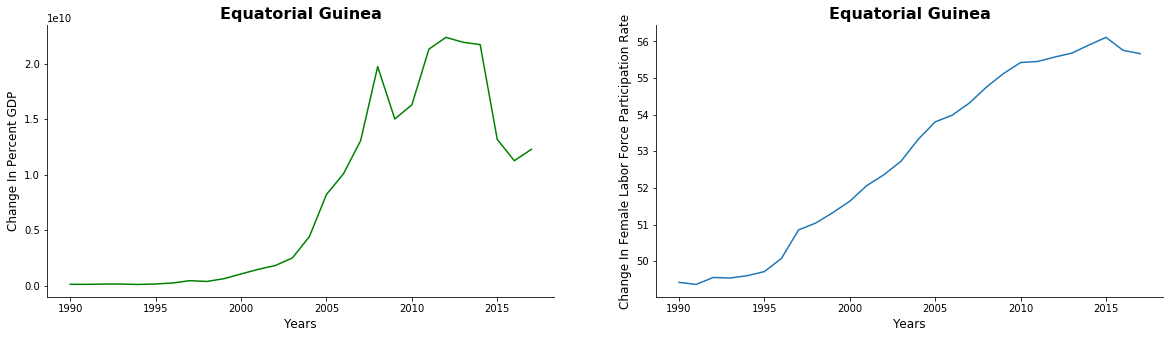

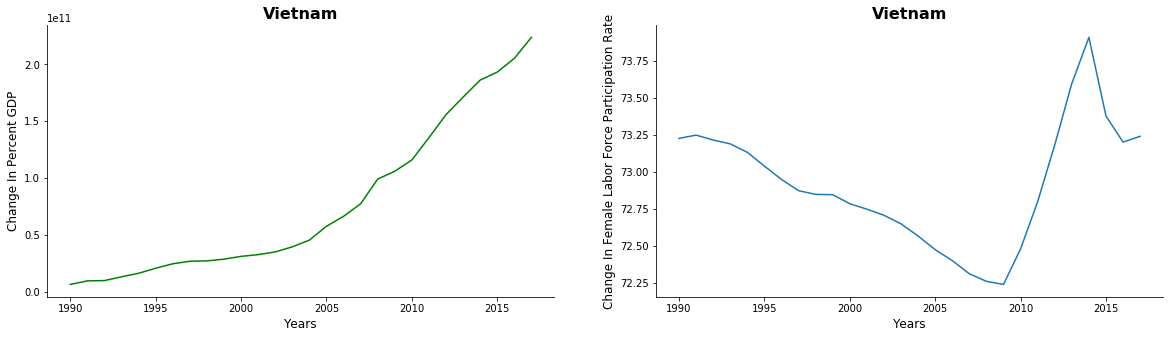

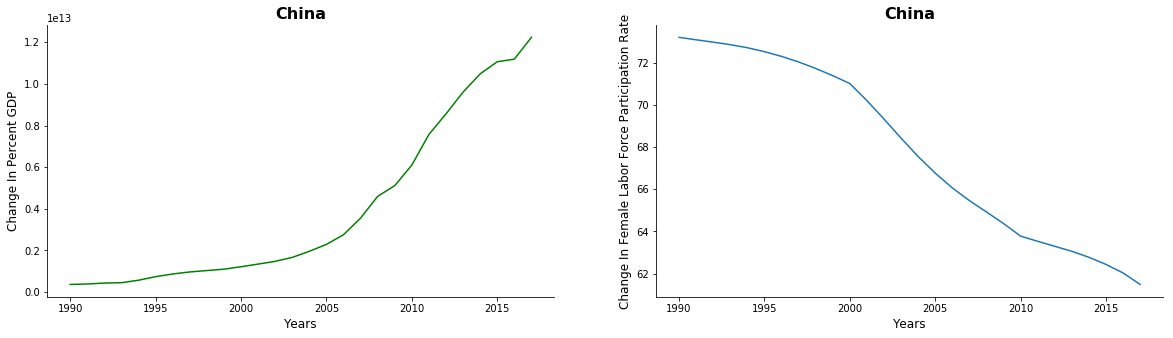

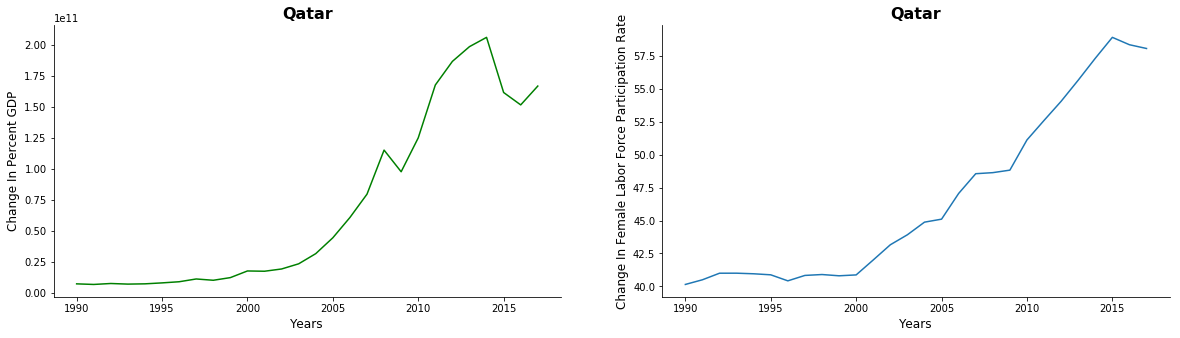

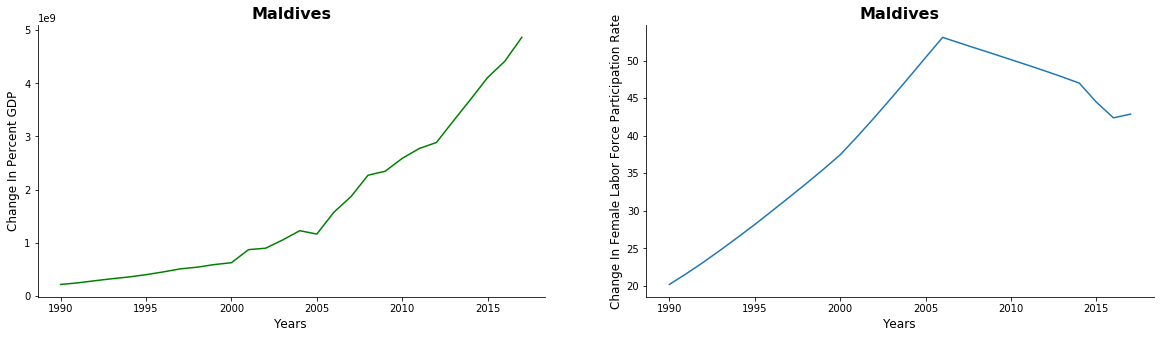

In [191]:
print(Fore.BLUE + Style.BRIGHT + "                                 Top Five Countries: Growth in Percent GDP Over Time")

for country in top_5_percent_change_gdp:
       
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize= (20,5))
    
    ax1.plot(gdp_df_transposed.index, gdp_df_transposed[country], color = "green")

    ax1.set_xlabel("Years", fontsize = 12)
    ax1.set_ylabel("Change In Percent GDP", fontsize = 12)

    ax1.set_title(country, fontsize = 16, fontweight = "bold")

    ax1.spines["right"].set_visible(False)
    ax1.spines["top"].set_visible(False)
    
    ax2.plot(lf_df_transposed.index, lf_df_transposed[country])

    ax2.set_xlabel("Years", fontsize = 12)
    ax2.set_ylabel("Change In Female Labor Force Participation Rate", fontsize = 12)

    ax2.set_title(country, fontsize = 16, fontweight = "bold")

    ax2.spines["right"].set_visible(False)
    ax2.spines["top"].set_visible(False)
    
    plt.savefig("top_5_percent_gdp_change.png", bbox_inches = "tight")

    plt.show()

                                 Bottom Five Countries: Growth in their GDP Over Time


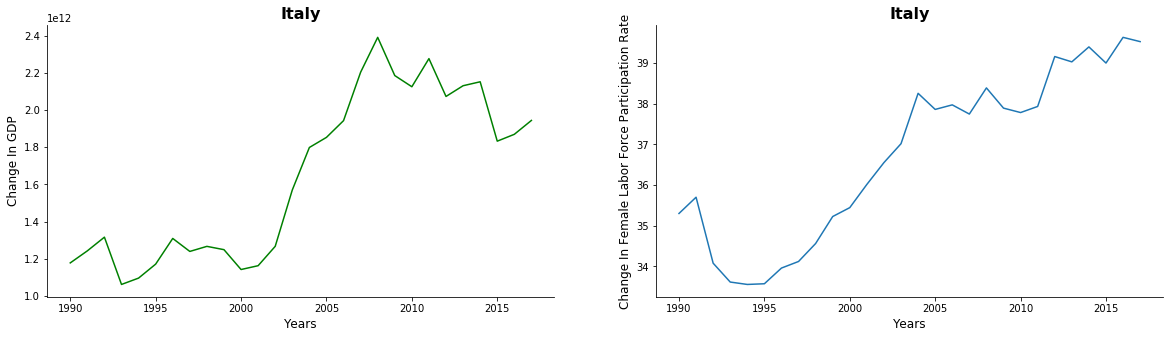

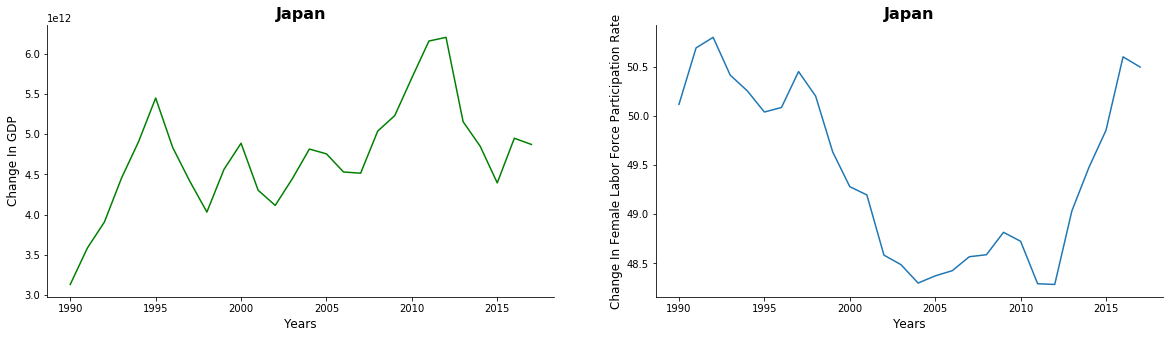

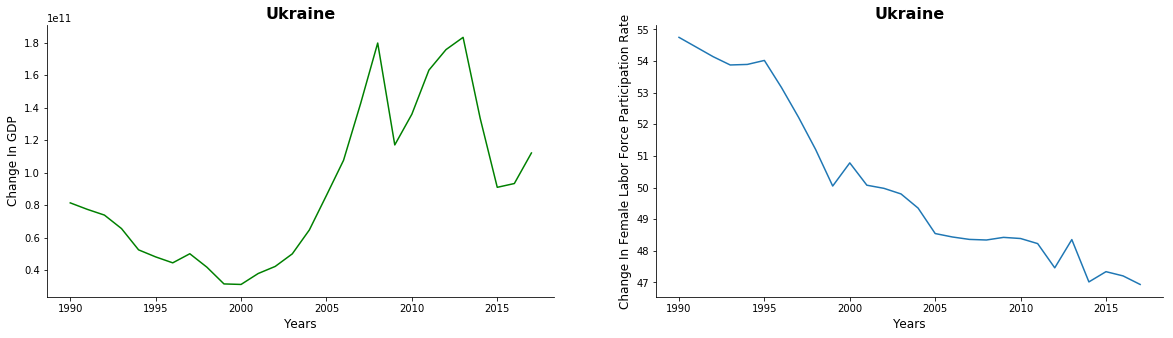

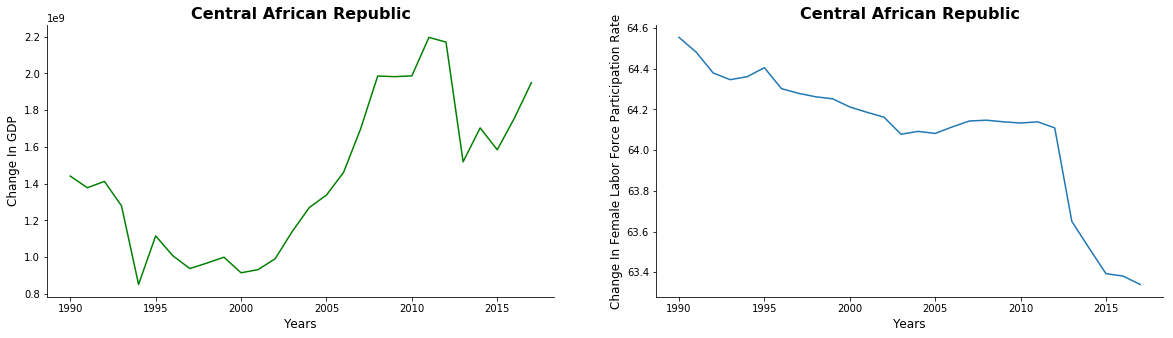

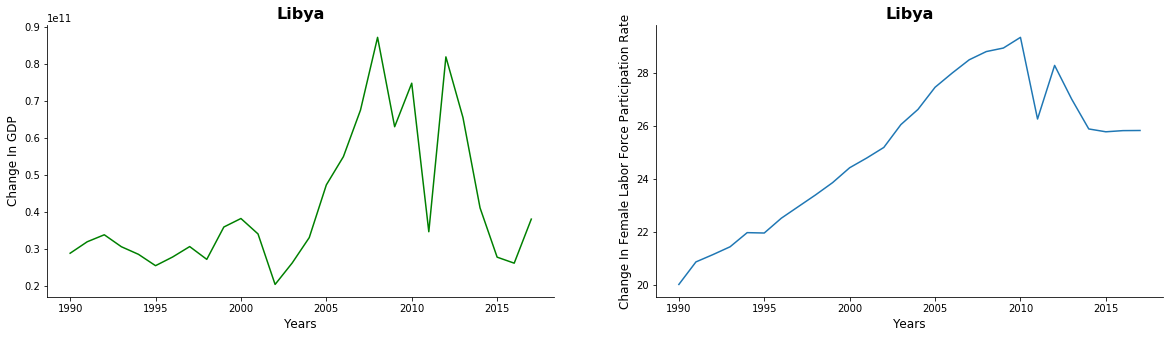

In [192]:
print(Fore.BLUE + Style.BRIGHT + "                                 Bottom Five Countries: Growth in their GDP Over Time")

for country in bottom_5_percent_change_gdp:
       
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize= (20,5))
    
    ax1.plot(gdp_df_transposed.index, gdp_df_transposed[country], color = "green")

    ax1.set_xlabel("Years", fontsize = 12)
    ax1.set_ylabel("Change In GDP", fontsize = 12)

    ax1.set_title(country, fontsize = 16, fontweight = "bold")

    ax1.spines["right"].set_visible(False)
    ax1.spines["top"].set_visible(False)
    
    ax2.plot(lf_df_transposed.index, lf_df_transposed[country])

    ax2.set_xlabel("Years", fontsize = 12)
    ax2.set_ylabel("Change In Female Labor Force Participation Rate", fontsize = 12)

    ax2.set_title(country, fontsize = 16, fontweight = "bold")

    ax2.spines["right"].set_visible(False)
    ax2.spines["top"].set_visible(False)
    
    plt.savefig("bottom_five_percent_change_gdp.png", bbox_inches = "tight")

    plt.show()

With the exception of China, most of these graphs support or somewhat support a positive association between the Female Labor Force Participation and GDP. Let's scale our graphs up and look at what is happening on a worldwide basis.

For these graphs, I took the top 5%, the 5-10% and the bottom 10-99% groups of countries that experienced the highest increase in female labor force participation and compared their average rate of labor force change, their relative contribution to the global female labor force participation rate, their average growth in GDP and their average growth in percent GDP.   

In [193]:
lf_df.shape

(157, 29)

In [194]:
157*.05

7.8500000000000005

round up to eight

In [195]:
lf_df = lf_df.sort_values(by="∆lf", ascending = False)

In [196]:
lf_df

1,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,∆lf
Country Name,,,,,,,,,,,,,,,,,,,,,
Colombia,29.856001,30.379999,30.976000,31.450001,32.861000,34.294998,35.751999,37.223000,38.709000,40.208000,...,55.125999,56.196999,57.279999,58.457001,58.631001,58.358002,58.967999,58.623001,58.805000,28.948999
Peru,43.134998,43.500999,44.584000,45.688999,46.824001,50.083000,52.778000,55.532001,55.909000,58.153000,...,70.509003,72.033997,71.303001,71.141998,70.634003,69.642998,68.067001,68.513000,68.988998,25.854000
Mali,35.404999,35.433998,35.373001,35.367001,35.382999,35.400002,35.452000,35.516998,35.613998,35.701000,...,47.481998,49.884998,52.608002,55.283001,57.869999,60.330002,60.374001,60.431000,60.757999,25.353001
Maldives,20.212999,21.652000,23.184999,24.799999,26.475000,28.186001,29.974001,31.778999,33.610001,35.495998,...,50.865002,50.122002,49.375000,48.615002,47.826000,46.995998,44.469002,42.376999,42.875999,22.663000
"Macao SAR, China",44.164001,44.419998,45.953999,46.387001,47.289001,48.328999,55.490002,55.112000,54.915001,55.431000,...,65.244003,65.306000,66.182999,65.510002,66.209999,66.589996,66.597000,66.122002,66.082001,21.917999
Belize,34.488998,35.054001,35.686001,35.883999,35.634998,35.783001,36.131001,37.127998,38.141998,39.193001,...,51.125000,52.444000,53.498001,54.527000,53.701000,52.930000,52.212002,52.768002,53.238998,18.750000
Chile,32.075001,31.854000,33.848000,35.484001,35.490002,34.356998,34.692001,35.546001,36.320999,36.525002,...,43.379002,47.058998,48.945000,49.154999,49.567001,50.130001,50.108002,50.351002,50.582001,18.507000
Spain,33.840000,34.020000,34.590000,35.099998,36.278000,36.685001,37.214001,37.993000,38.375999,39.078999,...,50.777000,51.543999,52.125999,52.644001,52.618999,52.375999,52.316002,52.301998,52.152000,18.312000
Luxembourg,34.120998,35.930000,38.105000,36.944000,37.706001,35.283001,36.363998,37.394001,37.708000,39.708000,...,48.766998,48.827999,49.408001,50.970001,51.109001,51.992001,53.558998,52.240002,52.269001,18.148003


In [197]:
top_5 = lf_df.head(8)

In [198]:
top_5

1,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,∆lf
Country Name,,,,,,,,,,,,,,,,,,,,,
Colombia,29.856001,30.379999,30.976000,31.450001,32.861000,34.294998,35.751999,37.223000,38.709000,40.208000,...,55.125999,56.196999,57.279999,58.457001,58.631001,58.358002,58.967999,58.623001,58.805000,28.948999
Peru,43.134998,43.500999,44.584000,45.688999,46.824001,50.083000,52.778000,55.532001,55.909000,58.153000,...,70.509003,72.033997,71.303001,71.141998,70.634003,69.642998,68.067001,68.513000,68.988998,25.854000
Mali,35.404999,35.433998,35.373001,35.367001,35.382999,35.400002,35.452000,35.516998,35.613998,35.701000,...,47.481998,49.884998,52.608002,55.283001,57.869999,60.330002,60.374001,60.431000,60.757999,25.353001
Maldives,20.212999,21.652000,23.184999,24.799999,26.475000,28.186001,29.974001,31.778999,33.610001,35.495998,...,50.865002,50.122002,49.375000,48.615002,47.826000,46.995998,44.469002,42.376999,42.875999,22.663000
"Macao SAR, China",44.164001,44.419998,45.953999,46.387001,47.289001,48.328999,55.490002,55.112000,54.915001,55.431000,...,65.244003,65.306000,66.182999,65.510002,66.209999,66.589996,66.597000,66.122002,66.082001,21.917999
Belize,34.488998,35.054001,35.686001,35.883999,35.634998,35.783001,36.131001,37.127998,38.141998,39.193001,...,51.125000,52.444000,53.498001,54.527000,53.701000,52.930000,52.212002,52.768002,53.238998,18.750000
Chile,32.075001,31.854000,33.848000,35.484001,35.490002,34.356998,34.692001,35.546001,36.320999,36.525002,...,43.379002,47.058998,48.945000,49.154999,49.567001,50.130001,50.108002,50.351002,50.582001,18.507000
Spain,33.840000,34.020000,34.590000,35.099998,36.278000,36.685001,37.214001,37.993000,38.375999,39.078999,...,50.777000,51.543999,52.125999,52.644001,52.618999,52.375999,52.316002,52.301998,52.152000,18.312000


In [199]:
five_to_ten = lf_df.head(-141)

In [200]:
five_to_ten = five_to_ten.tail(-8)

In [201]:
five_to_ten

1,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,∆lf
Country Name,,,,,,,,,,,,,,,,,,,,,
Luxembourg,34.120998,35.930000,38.105000,36.944000,37.706001,35.283001,36.363998,37.394001,37.708000,39.708000,...,48.766998,48.827999,49.408001,50.970001,51.109001,51.992001,53.558998,52.240002,52.269001,18.148003
Qatar,40.143002,40.498001,40.997002,40.999001,40.953999,40.875000,40.417000,40.828999,40.896999,40.800999,...,48.835999,51.132999,52.616001,54.070999,55.675999,57.341999,58.933998,58.373001,58.087002,17.944000
Botswana,47.747002,47.951000,48.105000,48.261002,48.469002,48.754002,48.926998,49.160999,49.377998,49.369999,...,56.264000,53.546001,57.425999,61.106998,64.554001,64.814003,65.027000,65.246002,65.613998,17.866997
Ireland,35.770000,36.509998,36.661999,38.250000,39.338001,39.937000,41.501999,42.488998,44.599998,46.535000,...,53.789001,53.296001,52.992001,52.742001,53.127998,52.715000,52.626999,53.241001,52.976002,17.206001
Bahrain,28.851000,28.938000,29.514000,30.180000,30.917000,31.672001,32.202999,32.730000,33.317001,34.004002,...,42.604000,43.763000,43.004002,43.202999,43.404999,43.615002,43.800999,43.901001,44.035999,15.184999
Netherlands,43.049000,43.825001,45.110001,45.584999,46.689999,47.307999,48.340000,49.727001,50.575001,52.105000,...,59.744999,58.249001,58.092999,58.625000,58.536999,57.813999,58.202999,58.020000,57.966000,14.917000
Panama,38.247002,39.056000,39.736000,40.451000,41.415001,42.793999,43.244999,43.688999,43.912998,44.116001,...,49.773998,49.112999,46.676998,48.424000,50.658001,50.856998,51.817001,52.778000,52.799999,14.552998
St. Vincent and the Grenadines,44.111000,44.682999,45.620998,46.383999,46.729000,47.731998,48.318001,49.042999,49.786999,50.345001,...,57.101002,57.264999,57.456001,57.745998,58.032001,58.199001,58.296001,58.492001,58.636002,14.525002


In [202]:
ninetynine = lf_df.tail(-16)

In [203]:
ninetynine

1,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,∆lf
Country Name,,,,,,,,,,,,,,,,,,,,,
Malta,27.927999,28.059999,28.322001,28.514999,28.472000,28.271999,28.545000,28.757999,28.987000,29.480000,...,33.390999,34.083000,35.458000,37.462002,39.259998,40.692001,41.611000,42.338001,42.304001,14.376001
St. Lucia,47.300999,47.778000,48.425999,49.084000,49.713001,50.285000,50.844002,51.349998,51.827999,52.305000,...,59.068001,58.897999,59.256001,59.516998,59.862000,60.202999,60.620998,60.901001,61.160999,13.860001
Nicaragua,36.522999,36.368999,35.612000,34.873001,34.287998,33.831001,34.215000,35.132999,36.069000,37.243000,...,46.610001,47.061001,47.523998,47.987999,48.449001,48.896000,49.487000,50.049999,50.320000,13.797001
Brunei Darussalam,45.779999,46.209000,47.146000,48.143002,49.214001,50.362000,51.299000,52.335999,53.484001,54.679001,...,57.632999,58.042999,58.490002,58.909000,59.313999,59.717999,59.397999,59.029999,59.025002,13.245003
Israel,46.266998,46.724998,47.994999,49.021000,50.505001,51.287998,51.118999,51.013000,51.111000,52.298000,...,56.832001,57.028999,56.794998,57.966999,58.132000,59.028000,58.986000,59.372002,59.341000,13.074001
Singapore,47.618000,48.160000,48.680000,49.465000,50.188999,50.771999,51.110001,51.421001,50.806999,51.222000,...,55.912998,57.058998,57.608002,58.417000,58.603001,59.707001,60.798000,60.629002,60.473000,12.855000
Trinidad and Tobago,38.578999,44.006001,43.550999,43.188999,44.044998,44.813999,46.883999,46.847000,46.798000,46.752998,...,51.660999,52.521999,52.734001,52.893002,52.991001,53.028000,51.660000,51.022999,51.012001,12.433002
Costa Rica,32.903000,33.799999,33.145000,34.053001,35.089001,36.122002,34.564999,37.662998,40.119999,40.173000,...,46.342999,44.145000,46.188000,45.926998,46.466999,49.335999,48.804001,45.022999,45.325001,12.422001
Senegal,33.375000,33.366001,33.353001,33.348999,33.349998,33.410999,33.415001,33.445999,33.514999,33.599998,...,40.348999,42.437000,44.536999,44.652000,44.758999,44.876999,45.022999,45.167000,45.525002,12.150002


In [204]:
avg_rate_change_top_5 = (sum(top_5["∆lf"]))/(8)

In [205]:
avg_rate_change_top_5

22.538249969482397

In [206]:
avg_rate_change_five_to_ten = (sum(five_to_ten["∆lf"]))/(8)

In [207]:
avg_rate_change_five_to_ten

16.2931249141693

In [208]:
avg_rate_change_ninetynine = (sum(ninetynine["∆lf"]))/(141)

In [209]:
avg_rate_change_ninetynine

2.852029767647471

In [210]:
avg_change_lf_df = pd.DataFrame(columns=['Average Rate of Change in Labor Force'], index=['Top 5%','5-10%','10-99%'])
avg_change_lf_df.loc['Top 5%'] = pd.Series({'Average Rate of Change in Labor Force' : 22.538249969482397})
avg_change_lf_df.loc['5-10%'] = pd.Series({'Average Rate of Change in Labor Force' : 16.2931249141693})
avg_change_lf_df.loc['10-99%'] = pd.Series({'Average Rate of Change in Labor Force' : 2.852029767647471})

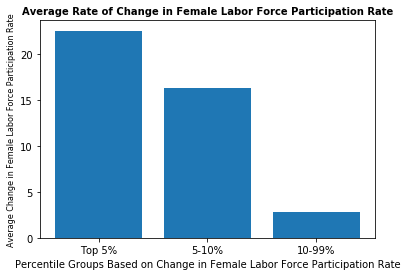

In [211]:
fig, ax = plt.subplots()

ax.bar(avg_change_lf_df.index, avg_change_lf_df["Average Rate of Change in Labor Force"])

ax.set_xlabel("Percentile Groups Based on Change in Female Labor Force Participation Rate", fontsize = 10)

ax.set_ylabel("Average Change in Female Labor Force Participation Rate", fontsize = 8)

ax.set_title("Average Rate of Change in Female Labor Force Participation Rate", fontsize = 10, fontweight = "bold")

plt.savefig("average_rate_of_change_∆lf_bar.png", bbox_inches = "tight")

plt.show()

In [212]:
sum(lf_df["∆lf"])

712.7871963075073

In [213]:
total_rep_top_5 =  (sum(top_5["∆lf"]))/(sum(lf_df["∆lf"]))*(100)

In [214]:
total_rep_top_5

25.295908889765244

In [215]:
total_rep_five_to_ten = (sum(five_to_ten["∆lf"])) /(sum(lf_df["∆lf"]))*(100)

In [216]:
total_rep_five_to_ten

18.286663956449857

In [217]:
total_rep_ninetynine =  (sum(ninetynine["∆lf"]))/(sum(lf_df["∆lf"]))*(100)

In [218]:
total_rep_ninetynine

56.41742715378486

In [219]:
total_rep_df = pd.DataFrame(columns=['Percent Representation of Global Labor Force Growth for Women'], index=['Top 5%','5-10%','10-99%'])
total_rep_df.loc['Top 5%'] = pd.Series({'Percent Representation of Global Labor Force Growth for Women' : 25.295908889765244})
total_rep_df.loc['5-10%'] = pd.Series({'Percent Representation of Global Labor Force Growth for Women' : 18.286663956449857})
total_rep_df.loc['10-99%'] = pd.Series({'Percent Representation of Global Labor Force Growth for Women' : 56.41742715378486})

In [220]:
total_rep_df

,Percent Representation of Global Labor Force Growth for Women
Top 5%,25.2959
5-10%,18.2867
10-99%,56.4174


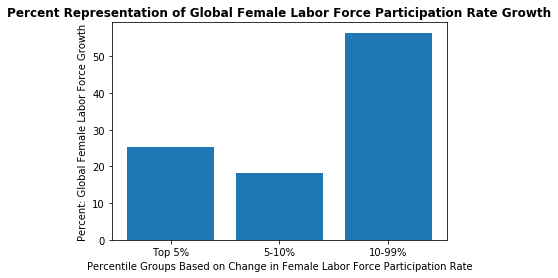

In [221]:
fig, ax = plt.subplots()

ax.bar(total_rep_df.index, total_rep_df["Percent Representation of Global Labor Force Growth for Women"])

ax.set_xlabel("Percentile Groups Based on Change in Female Labor Force Participation Rate", fontsize = 10)

ax.set_ylabel("Percent: Global Female Labor Force Growth", fontsize = 10)

ax.set_title("Percent Representation of Global Female Labor Force Participation Rate Growth", fontsize = 12, fontweight = "bold")

plt.savefig("percent_global_flfpr_growth.png", bbox_inches = "tight")

plt.show()

In [222]:
top_5

1,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,∆lf
Country Name,,,,,,,,,,,,,,,,,,,,,
Colombia,29.856001,30.379999,30.976000,31.450001,32.861000,34.294998,35.751999,37.223000,38.709000,40.208000,...,55.125999,56.196999,57.279999,58.457001,58.631001,58.358002,58.967999,58.623001,58.805000,28.948999
Peru,43.134998,43.500999,44.584000,45.688999,46.824001,50.083000,52.778000,55.532001,55.909000,58.153000,...,70.509003,72.033997,71.303001,71.141998,70.634003,69.642998,68.067001,68.513000,68.988998,25.854000
Mali,35.404999,35.433998,35.373001,35.367001,35.382999,35.400002,35.452000,35.516998,35.613998,35.701000,...,47.481998,49.884998,52.608002,55.283001,57.869999,60.330002,60.374001,60.431000,60.757999,25.353001
Maldives,20.212999,21.652000,23.184999,24.799999,26.475000,28.186001,29.974001,31.778999,33.610001,35.495998,...,50.865002,50.122002,49.375000,48.615002,47.826000,46.995998,44.469002,42.376999,42.875999,22.663000
"Macao SAR, China",44.164001,44.419998,45.953999,46.387001,47.289001,48.328999,55.490002,55.112000,54.915001,55.431000,...,65.244003,65.306000,66.182999,65.510002,66.209999,66.589996,66.597000,66.122002,66.082001,21.917999
Belize,34.488998,35.054001,35.686001,35.883999,35.634998,35.783001,36.131001,37.127998,38.141998,39.193001,...,51.125000,52.444000,53.498001,54.527000,53.701000,52.930000,52.212002,52.768002,53.238998,18.750000
Chile,32.075001,31.854000,33.848000,35.484001,35.490002,34.356998,34.692001,35.546001,36.320999,36.525002,...,43.379002,47.058998,48.945000,49.154999,49.567001,50.130001,50.108002,50.351002,50.582001,18.507000
Spain,33.840000,34.020000,34.590000,35.099998,36.278000,36.685001,37.214001,37.993000,38.375999,39.078999,...,50.777000,51.543999,52.125999,52.644001,52.618999,52.375999,52.316002,52.301998,52.152000,18.312000


In [223]:
top_5_gdp = gdp_df[(gdp_df.index.isin((top_5.index)))]

In [224]:
top_5_gdp

1,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,∆gdp,%increase
Country Name,,,,,,,,,,,,,,,,,,,,,
Maldives,2.150890e+08,2.444683e+08,2.848534e+08,3.223266e+08,3.558844e+08,3.989890e+08,4.503823e+08,5.082236e+08,5.400964e+08,5.892398e+08,...,2.588176e+09,2.774352e+09,2.886171e+09,3.295011e+09,3.697352e+09,4.109425e+09,4.414056e+09,4.865546e+09,4.650457e+09,2162.108201
"Macao SAR, China",3.220920e+09,3.735117e+09,4.879019e+09,5.625533e+09,6.265844e+09,6.996034e+09,7.122540e+09,7.211265e+09,6.742367e+09,6.490572e+09,...,2.812364e+10,3.670986e+10,4.303158e+10,5.155208e+10,5.534800e+10,4.536168e+10,4.531088e+10,5.036120e+10,4.714028e+10,1463.565682
Chile,3.311389e+10,3.783479e+10,4.596433e+10,4.929777e+10,5.700843e+10,7.344706e+10,7.803957e+10,8.495236e+10,8.157743e+10,7.517379e+10,...,2.185376e+11,2.522520e+11,2.671223e+11,2.783843e+11,2.605841e+11,2.439995e+11,2.500362e+11,2.770759e+11,2.439621e+11,736.736375
Peru,2.641039e+10,3.467212e+10,3.613923e+10,3.515811e+10,4.488208e+10,5.331279e+10,5.525241e+10,5.814752e+10,5.550147e+10,5.018732e+10,...,1.475289e+11,1.717617e+11,1.926490e+11,2.012177e+11,2.010807e+11,1.899265e+11,1.916397e+11,2.113893e+11,1.849789e+11,700.402035
Colombia,4.784409e+10,4.917557e+10,5.841899e+10,6.644680e+10,8.170350e+10,9.250728e+10,9.716011e+10,1.066595e+11,9.844374e+10,8.618616e+10,...,2.861036e+11,3.344540e+11,3.705744e+11,3.818666e+11,3.811121e+11,2.934817e+11,2.828561e+11,3.144576e+11,2.666135e+11,557.254840
Mali,2.681912e+09,2.724132e+09,2.830673e+09,2.818281e+09,2.081846e+09,2.706425e+09,2.780422e+09,2.697106e+09,2.920359e+09,3.439463e+09,...,1.067875e+10,1.297811e+10,1.244275e+10,1.324641e+10,1.434583e+10,1.309950e+10,1.401079e+10,1.533434e+10,1.265242e+10,471.768797
Belize,4.120864e+08,4.447208e+08,5.182391e+08,5.598582e+08,5.808637e+08,6.201404e+08,6.413838e+08,6.543144e+08,6.889924e+08,7.327324e+08,...,1.396732e+09,1.486596e+09,1.563828e+09,1.608442e+09,1.692956e+09,1.762500e+09,1.806646e+09,1.862615e+09,1.450528e+09,351.996133
Spain,5.351012e+11,5.755985e+11,6.292024e+11,5.236495e+11,5.291216e+11,6.129397e+11,6.409983e+11,5.886920e+11,6.170420e+11,6.331941e+11,...,1.431617e+12,1.488067e+12,1.336019e+12,1.361854e+12,1.376911e+12,1.199084e+12,1.237499e+12,1.314314e+12,7.792129e+11,145.619715


In [225]:
five_to_ten_gdp = gdp_df[(gdp_df.index.isin((five_to_ten.index)))]

In [226]:
ninetynine_gdp = gdp_df[(gdp_df.index.isin((ninetynine.index)))]

In [227]:
top_5_gdp_avg_change = sum(top_5_gdp["∆gdp"])/8

In [228]:
top_5_gdp_avg_change

192582632429.23517

In [229]:
five_to_ten_avg_change = sum(five_to_ten_gdp["∆gdp"])/8

In [230]:
five_to_ten_avg_change

138529884042.79422

In [231]:
ninetynine_avg_change = sum(ninetynine_gdp["∆gdp"])/141

In [232]:
ninetynine_avg_change

380383848507.6408

In [233]:
avg_change_gdp_df = pd.DataFrame(columns=['Average Change in GDP'], index=['Top 5%','5-10%','10-99%'])
avg_change_gdp_df.loc['Top 5%'] = pd.Series({'Average Change in GDP' : 192582632429.23517})
avg_change_gdp_df.loc['5-10%'] = pd.Series({'Average Change in GDP' : 138529884042.79422})
avg_change_gdp_df.loc['10-99%'] = pd.Series({'Average Change in GDP' : 380383848507.6408})

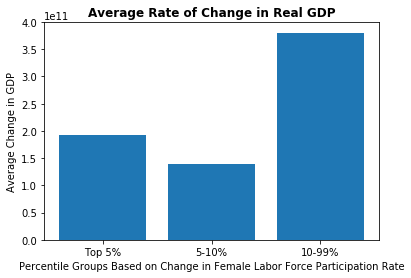

In [234]:
fig, ax = plt.subplots()

ax.bar(avg_change_gdp_df.index, avg_change_gdp_df["Average Change in GDP"])

ax.set_xlabel("Percentile Groups Based on Change in Female Labor Force Participation Rate")

ax.set_ylabel("Average Change in GDP")

ax.set_title("Average Rate of Change in Real GDP", fontsize = 12, fontweight = "bold")

plt.savefig("avg_rate_of_change_real_gdp.png", bbox_inches = "tight")

plt.show()

In [235]:
top_5_gdp_avg_percentage_change = sum(top_5_gdp["%increase"])/8

In [236]:
top_5_gdp_avg_percentage_change

823.6814722366782

In [237]:
five_to_ten_avg_percentage_change = sum(five_to_ten_gdp["%increase"])/8

In [238]:
five_to_ten_avg_percentage_change

683.2839417325531

In [239]:
ninetynine_avg_percentage_change = sum(ninetynine_gdp["%increase"])/141

In [240]:
ninetynine_avg_percentage_change

541.9012117053653

In [241]:
avg_percent_change_gdp_df = pd.DataFrame(columns=['Average Percent Change in GDP'], index=['Top 5%','5-10%','10-99%'])
avg_percent_change_gdp_df.loc['Top 5%'] = pd.Series({'Average Percent Change in GDP' : 823.6814722366782})
avg_percent_change_gdp_df.loc['5-10%'] = pd.Series({'Average Percent Change in GDP' : 683.2839417325531})
avg_percent_change_gdp_df.loc['10-99%'] = pd.Series({'Average Percent Change in GDP' : 541.9012117053653})

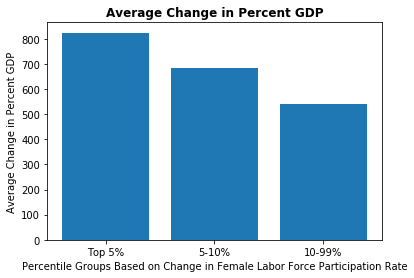

In [243]:
fig, ax = plt.subplots()

ax.bar(avg_percent_change_gdp_df.index, avg_percent_change_gdp_df["Average Percent Change in GDP"])

ax.set_xlabel("Percentile Groups Based on Change in Female Labor Force Participation Rate")

ax.set_ylabel("Average Change in Percent GDP")

ax.set_title("Average Change in Percent GDP", fontsize = 12, fontweight = "bold")

plt.savefig("avg_change_in_percent_gdp.png", bbox_inches = "tight")

plt.show()

Lastly, I created a scatterplot to show that the association exists by taking the difference in the log of labor force over time against the logs of gdp over time and the logs of percent gdp over time. The last two graphs show the association with the dot size equivalent to the country's gdp per capita. 

In [244]:
pop_df["∆pop"] = pop_df[2017.0] - pop_df[1990.0]

In [245]:
lf_df

1,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,∆lf
Country Name,,,,,,,,,,,,,,,,,,,,,
Colombia,29.856001,30.379999,30.976000,31.450001,32.861000,34.294998,35.751999,37.223000,38.709000,40.208000,...,55.125999,56.196999,57.279999,58.457001,58.631001,58.358002,58.967999,58.623001,58.805000,28.948999
Peru,43.134998,43.500999,44.584000,45.688999,46.824001,50.083000,52.778000,55.532001,55.909000,58.153000,...,70.509003,72.033997,71.303001,71.141998,70.634003,69.642998,68.067001,68.513000,68.988998,25.854000
Mali,35.404999,35.433998,35.373001,35.367001,35.382999,35.400002,35.452000,35.516998,35.613998,35.701000,...,47.481998,49.884998,52.608002,55.283001,57.869999,60.330002,60.374001,60.431000,60.757999,25.353001
Maldives,20.212999,21.652000,23.184999,24.799999,26.475000,28.186001,29.974001,31.778999,33.610001,35.495998,...,50.865002,50.122002,49.375000,48.615002,47.826000,46.995998,44.469002,42.376999,42.875999,22.663000
"Macao SAR, China",44.164001,44.419998,45.953999,46.387001,47.289001,48.328999,55.490002,55.112000,54.915001,55.431000,...,65.244003,65.306000,66.182999,65.510002,66.209999,66.589996,66.597000,66.122002,66.082001,21.917999
Belize,34.488998,35.054001,35.686001,35.883999,35.634998,35.783001,36.131001,37.127998,38.141998,39.193001,...,51.125000,52.444000,53.498001,54.527000,53.701000,52.930000,52.212002,52.768002,53.238998,18.750000
Chile,32.075001,31.854000,33.848000,35.484001,35.490002,34.356998,34.692001,35.546001,36.320999,36.525002,...,43.379002,47.058998,48.945000,49.154999,49.567001,50.130001,50.108002,50.351002,50.582001,18.507000
Spain,33.840000,34.020000,34.590000,35.099998,36.278000,36.685001,37.214001,37.993000,38.375999,39.078999,...,50.777000,51.543999,52.125999,52.644001,52.618999,52.375999,52.316002,52.301998,52.152000,18.312000
Luxembourg,34.120998,35.930000,38.105000,36.944000,37.706001,35.283001,36.363998,37.394001,37.708000,39.708000,...,48.766998,48.827999,49.408001,50.970001,51.109001,51.992001,53.558998,52.240002,52.269001,18.148003


In [246]:
lf_df["log_2017"] = np.log(lf_df[2017.0])

In [247]:
lf_df["log_1990"] = np.log(lf_df[1990.0])

In [248]:
lf_df["∆logs"] = lf_df["log_2017"] - lf_df["log_1990"]

In [249]:
lf_df_all["log_2017"] = np.log(lf_df_all[2017.0])

In [250]:
lf_df_all["log_1990"] = np.log(lf_df_all[1990.0])

In [251]:
lf_df_all["∆logs"] = lf_df_all["log_2017"] - lf_df_all["log_1990"]

In [282]:
gdp_df["log_2017"] = np.log(gdp_df[2017.0])

In [283]:
gdp_df["log_1990"] = np.log(gdp_df[1990.0])

In [284]:
gdp_df["∆logs"] = gdp_df["log_2017"] - gdp_df["log_1990"]

In [252]:
gdp_df_all["log_2017"] = np.log(gdp_df_all[2017.0])

In [253]:
gdp_df_all["log_1990"] = np.log(gdp_df_all[1990.0])

In [254]:
gdp_df_all["∆logs"] = gdp_df_all["log_2017"] - gdp_df_all["log_1990"]

In [279]:
lf_df.sort_values(by = "∆logs")

1,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,∆lf,log_2017,log_1990,∆logs
Country Name,,,,,,,,,,,,,,,,,,,,,
"Yemen, Rep.",16.832001,16.792999,16.761000,16.806999,16.848000,17.761999,18.707001,19.691000,20.716999,21.785999,...,7.800000,6.884000,6.084000,6.133000,6.171000,5.998000,-10.834001,1.791426,2.823282,-1.031856
Romania,62.076000,62.212002,62.381001,62.236000,62.043999,61.828999,58.709999,59.541000,58.443001,58.505001,...,46.279999,46.002998,46.146000,45.194000,44.476002,44.104000,-17.972000,3.786550,4.128359,-0.341809
Burkina Faso,76.218002,76.285004,75.478996,74.650002,73.792000,72.907997,71.987999,71.038002,70.063004,69.059998,...,58.971001,58.606998,58.249001,58.306000,58.367001,58.147999,-18.070004,4.062991,4.333598,-0.270606
Sri Lanka,45.514999,41.646999,38.049999,37.891998,38.530998,36.330002,35.808998,35.486000,41.630001,37.854000,...,32.889000,35.691002,34.763000,34.917999,35.195000,35.054001,-10.460999,3.556890,3.818042,-0.261152
India,35.106998,35.172001,35.286999,35.463001,35.722000,35.431000,35.130001,34.830002,34.532001,34.237999,...,26.809000,26.961000,27.117001,27.267000,27.448000,27.209000,-7.897999,3.303548,3.558400,-0.254853
China,73.197998,73.083000,72.971001,72.851997,72.707001,72.519997,72.296997,72.032997,71.725998,71.383003,...,63.296001,63.058998,62.775002,62.436001,62.034000,61.487999,-11.709999,4.118842,4.293168,-0.174326
Ukraine,54.748001,54.443001,54.137001,53.875000,53.891998,54.018002,53.162998,52.221001,51.202999,50.048000,...,47.462002,48.355000,47.016998,47.341000,47.207001,46.937000,-7.811001,3.848806,4.002741,-0.153935
Lesotho,68.709999,68.748001,68.789001,68.817001,68.882004,68.941002,68.981003,69.000999,68.996002,68.981003,...,59.388000,58.773998,58.926998,59.094002,59.282001,59.264999,-9.445000,4.082019,4.229895,-0.147876
Slovak Republic,59.783001,59.723000,57.602001,55.187000,51.445000,51.568001,52.304001,51.808998,51.228001,51.683998,...,50.727001,51.070999,51.118999,51.998001,52.653000,52.452999,-7.330002,3.959918,4.090721,-0.130804


In [267]:
lf_df_all[1990.0].loc["World"]

51.379113765679

In [268]:
lf_df_all[2017.0].loc["World"]

48.68722180239935

In [269]:
lf_df_all["∆lf"].loc["World"] = (lf_df_all[2017.0].loc["World"] ) - (lf_df_all[1990.0].loc["World"])

In [270]:
lf_df_all["∆lf"].loc["World"]

-2.6918919632796516

In [273]:
gdp_df_all["∆gdp"].loc["World"] = (gdp_df_all[2017.0].loc["World"] ) - (gdp_df_all[1990.0].loc["World"])

In [274]:
gdp_df_all["∆gdp"].loc["World"]

58323339995218.2

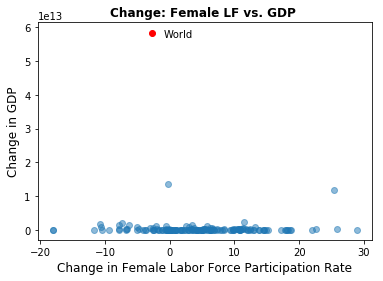

In [311]:
fix, ax = plt.subplots()

ax.scatter(lf_df["∆lf"], gdp_df["∆gdp"],
            alpha= 0.50)

ax.scatter(lf_df_all["∆lf"].loc["World"], gdp_df_all["∆gdp"].loc["World"], alpha = 1, color = "red")

ax.set_title('Change: Female LF vs. GDP ', loc='center', fontsize=12, fontweight = "bold") 

ax.annotate(
   "World",
    xy = (lf_df_all["∆lf"].loc["World"], gdp_df_all["∆gdp"].loc["World"]),
    xytext=(-1, 57000000000000), 
    fontsize=10, 
)

ax.set_xlabel("Change in Female Labor Force Participation Rate", fontsize=12)
ax.set_ylabel("Change in GDP", fontsize=12)
plt.savefig("change_lf_gdp.png", bbox_inches = "tight")
plt.show()

In [276]:
lf_df_all["∆logs"].loc["World"]

-0.05381513323696607

In [285]:
gdp_df

1,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,∆gdp,%increase,log_2017,log_1990,∆logs
Country Name,,,,,,,,,,,,,,,,,,,,,
Equatorial Guinea,1.121194e+08,1.109060e+08,1.347072e+08,1.360479e+08,1.008070e+08,1.418534e+08,2.324630e+08,4.423378e+08,3.706876e+08,6.211179e+08,...,2.194260e+10,2.173650e+10,1.318020e+10,1.126090e+10,1.229358e+10,1.218146e+10,10864.720160,23.232343,18.535075,4.697268
Vietnam,6.471741e+09,9.613370e+09,9.866990e+09,1.318095e+10,1.628643e+10,2.073616e+10,2.465747e+10,2.684370e+10,2.720960e+10,2.868366e+10,...,1.712220e+11,1.862047e+11,1.932411e+11,2.052762e+11,2.237799e+11,2.173081e+11,3357.800189,26.133929,22.590711,3.543218
China,3.608579e+11,3.833733e+11,4.269157e+11,4.447313e+11,5.643247e+11,7.345479e+11,8.637467e+11,9.616040e+11,1.029043e+12,1.093997e+12,...,9.607224e+12,1.048237e+13,1.106467e+13,1.119099e+13,1.223770e+13,1.187684e+13,3291.279518,30.135543,26.611750,3.523792
Qatar,7.360439e+09,6.883516e+09,7.646154e+09,7.156594e+09,7.374451e+09,8.137912e+09,9.059340e+09,1.129780e+10,1.025550e+10,1.239313e+10,...,1.987277e+11,2.062247e+11,1.617398e+11,1.517321e+11,1.669286e+11,1.595681e+11,2167.915838,25.840832,22.719385,3.121446
Maldives,2.150890e+08,2.444683e+08,2.848534e+08,3.223266e+08,3.558844e+08,3.989890e+08,4.503823e+08,5.082236e+08,5.400964e+08,5.892398e+08,...,3.295011e+09,3.697352e+09,4.109425e+09,4.414056e+09,4.865546e+09,4.650457e+09,2162.108201,22.305445,19.186562,3.118882
Lao PDR,8.655599e+08,1.028088e+09,1.127807e+09,1.327749e+09,1.543606e+09,1.763536e+09,1.873672e+09,1.747012e+09,1.280178e+09,1.454431e+09,...,1.194223e+10,1.326846e+10,1.439039e+10,1.580571e+10,1.685309e+10,1.598753e+10,1847.073604,23.547800,20.578887,2.968913
Lebanon,2.838485e+09,4.690415e+09,5.843579e+09,7.941744e+09,9.599127e+09,1.171880e+10,1.369022e+10,1.575187e+10,1.724718e+10,1.739106e+10,...,4.647139e+10,4.852460e+10,4.991027e+10,5.148391e+10,5.357699e+10,5.073850e+10,1787.520244,24.704385,21.766536,2.937849
"Macao SAR, China",3.220920e+09,3.735117e+09,4.879019e+09,5.625533e+09,6.265844e+09,6.996034e+09,7.122540e+09,7.211265e+09,6.742367e+09,6.490572e+09,...,5.155208e+10,5.534800e+10,4.536168e+10,4.531088e+10,5.036120e+10,4.714028e+10,1463.565682,24.642487,21.892933,2.749554
Nicaragua,1.009455e+09,1.488804e+09,1.792800e+09,1.756454e+09,3.863185e+09,4.140470e+09,4.308352e+09,4.389966e+09,4.635267e+09,4.855718e+09,...,1.098297e+10,1.188044e+10,1.261109e+10,1.318499e+10,1.381426e+10,1.280481e+10,1268.486452,23.348967,20.732677,2.616290


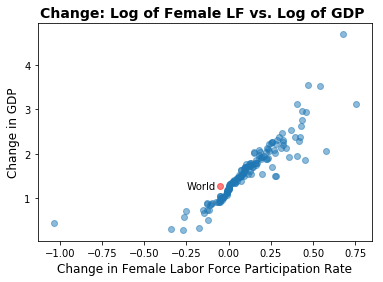

In [306]:
fix, ax = plt.subplots()

ax.scatter(lf_df["∆logs"], gdp_df["∆logs"],
            alpha= 0.50) 

ax.scatter(lf_df_all["∆logs"].loc["World"], gdp_df_all["∆logs"].loc["World"],
            alpha= 0.50, color = "red")

ax.set_title('Change: Log of Female LF vs. Log of GDP ', loc='center', fontsize=14, fontweight = "bold") 

ax.set_xlabel("Change in Female Labor Force Participation Rate", fontsize=12)
ax.set_ylabel("Change in GDP", fontsize=12)

ax.annotate(
   "World",
    xy = (lf_df_all["∆logs"].loc["World"], gdp_df_all["∆logs"].loc["World"]),
    xytext=(-0.25, 1.2), 
    fontsize=10, 
)

plt.savefig("change_log_lf_gdp.png", bbox_inches = "tight")
plt.show()

In [366]:
gdp_df

1,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,∆gdp,%increase,log_2017,log_1990,∆logs
Country Name,,,,,,,,,,,,,,,,,,,,,
Equatorial Guinea,1.121194e+08,1.109060e+08,1.347072e+08,1.360479e+08,1.008070e+08,1.418534e+08,2.324630e+08,4.423378e+08,3.706876e+08,6.211179e+08,...,2.194260e+10,2.173650e+10,1.318020e+10,1.126090e+10,1.229358e+10,1.218146e+10,10864.720160,23.232343,18.535075,4.697268
Vietnam,6.471741e+09,9.613370e+09,9.866990e+09,1.318095e+10,1.628643e+10,2.073616e+10,2.465747e+10,2.684370e+10,2.720960e+10,2.868366e+10,...,1.712220e+11,1.862047e+11,1.932411e+11,2.052762e+11,2.237799e+11,2.173081e+11,3357.800189,26.133929,22.590711,3.543218
China,3.608579e+11,3.833733e+11,4.269157e+11,4.447313e+11,5.643247e+11,7.345479e+11,8.637467e+11,9.616040e+11,1.029043e+12,1.093997e+12,...,9.607224e+12,1.048237e+13,1.106467e+13,1.119099e+13,1.223770e+13,1.187684e+13,3291.279518,30.135543,26.611750,3.523792
Qatar,7.360439e+09,6.883516e+09,7.646154e+09,7.156594e+09,7.374451e+09,8.137912e+09,9.059340e+09,1.129780e+10,1.025550e+10,1.239313e+10,...,1.987277e+11,2.062247e+11,1.617398e+11,1.517321e+11,1.669286e+11,1.595681e+11,2167.915838,25.840832,22.719385,3.121446
Maldives,2.150890e+08,2.444683e+08,2.848534e+08,3.223266e+08,3.558844e+08,3.989890e+08,4.503823e+08,5.082236e+08,5.400964e+08,5.892398e+08,...,3.295011e+09,3.697352e+09,4.109425e+09,4.414056e+09,4.865546e+09,4.650457e+09,2162.108201,22.305445,19.186562,3.118882
Lao PDR,8.655599e+08,1.028088e+09,1.127807e+09,1.327749e+09,1.543606e+09,1.763536e+09,1.873672e+09,1.747012e+09,1.280178e+09,1.454431e+09,...,1.194223e+10,1.326846e+10,1.439039e+10,1.580571e+10,1.685309e+10,1.598753e+10,1847.073604,23.547800,20.578887,2.968913
Lebanon,2.838485e+09,4.690415e+09,5.843579e+09,7.941744e+09,9.599127e+09,1.171880e+10,1.369022e+10,1.575187e+10,1.724718e+10,1.739106e+10,...,4.647139e+10,4.852460e+10,4.991027e+10,5.148391e+10,5.357699e+10,5.073850e+10,1787.520244,24.704385,21.766536,2.937849
"Macao SAR, China",3.220920e+09,3.735117e+09,4.879019e+09,5.625533e+09,6.265844e+09,6.996034e+09,7.122540e+09,7.211265e+09,6.742367e+09,6.490572e+09,...,5.155208e+10,5.534800e+10,4.536168e+10,4.531088e+10,5.036120e+10,4.714028e+10,1463.565682,24.642487,21.892933,2.749554
Nicaragua,1.009455e+09,1.488804e+09,1.792800e+09,1.756454e+09,3.863185e+09,4.140470e+09,4.308352e+09,4.389966e+09,4.635267e+09,4.855718e+09,...,1.098297e+10,1.188044e+10,1.261109e+10,1.318499e+10,1.381426e+10,1.280481e+10,1268.486452,23.348967,20.732677,2.616290


In [369]:
gdp_df["logs%"] = np.log(gdp_df["%increase"])

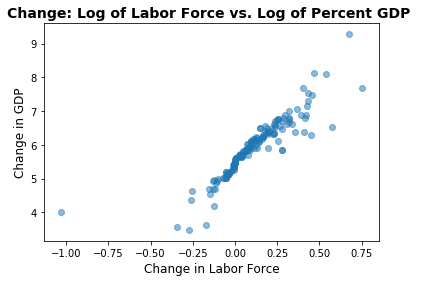

In [334]:
fix, ax = plt.subplots()

ax.scatter(lf_df["∆logs"], gdp_df["logs%"],
            alpha= 0.50) 

ax.set_title('Change: Log of Labor Force vs. Log of Percent GDP ', loc='center', fontsize=14, fontweight = "bold") 

ax.set_xlabel("Change in Labor Force", fontsize=12)
ax.set_ylabel("Change in GDP", fontsize=12)

plt.savefig("change_log_lf_percent_gdp.png", bbox_inches = "tight")
plt.show()

^without sizing

with sizing

In [386]:
merging_pop_df = pop_df.drop(columns = [
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0])

In [387]:
merging_pop_df.rename(columns={2017.0:'pop_in_2017'}, inplace=True)

In [388]:
merging_gdp_df = gdp_df.drop(columns = [
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0])

In [389]:
merging_gdp_df.rename(columns={2017.0:'gdp_in_2017'}, inplace=True)

In [390]:
both_df = pd.merge(merging_pop_df, merging_gdp_df, on='Country Name', how='left')

In [422]:
both_df

1,Country Name,pop_in_2017,∆pop,gdp_in_2017,∆gdp,%increase,log_2017,log_1990,∆logs,logs%,gdp_per_capita_in_2017
0,Angola,2.978419e+09,17612752.0,1.221238e+11,1.108951e+11,987.597993,25.528301,23.141745,2.386557,6.895276,41.002898
1,Albania,2.873457e+08,-413085.0,1.303854e+10,1.100998e+10,542.750447,23.291175,21.430589,1.860586,6.296650,45.375791
2,United Arab Emirates,9.400145e+08,7539971.0,3.825751e+11,3.318736e+11,654.564479,26.670191,24.649220,2.020971,6.483970,406.988493
3,Argentina,4.427104e+09,11541302.0,6.374303e+11,4.960780e+11,350.951291,27.180711,25.674522,1.506189,5.860647,143.983588
4,Armenia,2.930450e+08,-607715.0,1.153659e+10,9.279752e+09,411.183623,23.168790,21.537231,1.631559,6.019040,39.367983
5,Australia,2.460186e+09,7536760.0,1.323421e+12,1.012583e+12,325.759080,27.911241,26.462538,1.448703,5.786158,537.935373
6,Austria,8.797566e+08,1119716.0,4.168360e+11,2.503726e+11,150.407002,26.755959,25.838041,0.917917,5.013345,473.808296
7,Azerbaijan,9.854033e+08,2695033.0,4.074779e+10,3.168435e+10,349.583975,24.430667,22.927515,1.503152,5.856744,41.351386
8,Burundi,1.086424e+09,5448830.0,3.172416e+09,2.040315e+09,180.223711,21.877759,20.847341,1.030418,5.194199,2.920052
9,Belgium,1.138239e+09,1415014.0,4.947636e+11,2.883327e+11,139.675210,26.927346,26.053231,0.874115,4.939320,434.674459


In [418]:
both_df["pop_in_2017"] = both_df["pop_in_2017"]*(5000000)

In [419]:
both_df["gdp_per_capita_in_2017"] = (both_df["gdp_in_2017"])/(both_df["pop_in_2017"])

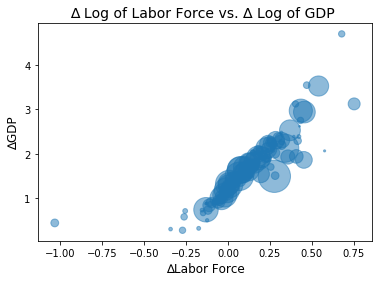

In [423]:
fix, ax = plt.subplots()

ax.scatter(lf_df["∆logs"], gdp_df["∆logs"],s=both_df["gdp_per_capita_in_2017"],
            alpha= 0.50) 

ax.set_title('∆ Log of Labor Force vs. ∆ Log of GDP ', loc='center', fontsize=14) 

ax.set_xlabel("∆Labor Force", fontsize=12)
ax.set_ylabel("∆GDP", fontsize=12)
plt.show()

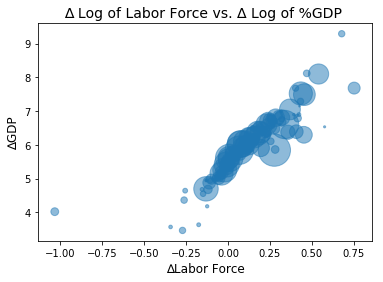

In [424]:
fix, ax = plt.subplots()

ax.scatter(lf_df["∆logs"], gdp_df["logs%"],s=both_df["gdp_per_capita_in_2017"],
            alpha= 0.50) 

ax.set_title('∆ Log of Labor Force vs. ∆ Log of %GDP ', loc='center', fontsize=14) 

ax.set_xlabel("∆Labor Force", fontsize=12)
ax.set_ylabel("∆GDP", fontsize=12)
plt.show()

The log graphs above prove a positive association between Female Labor Force Participation Rate and GDP exists! 